### STEP 1: Imports and Global Settings

In [24]:
# ============================================
# STEP 1: IMPORTS AND GLOBAL SETTINGS
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Machine Learning
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_recall_fscore_support, matthews_corrcoef

# Evaluation Metrics
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, precision_recall_curve, f1_score, precision_score, recall_score)

# Advanced Models (optional - install if available)
try:
    import xgboost as xgb
    XGB_AVAILABLE = True
except ImportError:
    XGB_AVAILABLE = False
    print("XGBoost not installed. Install with: pip install xgboost")

try:
    import lightgbm as lgb
    LGB_AVAILABLE = True
except ImportError:
    LGB_AVAILABLE = False
    print("LightGBM not installed. Install with: pip install lightgbm")

# Set random seed for reproducibility
np.random.seed(42)

print("✅ Imports completed successfully")

✅ Imports completed successfully


### STEP 2: Load and Explore Dataset

In [3]:
# ============================================
# STEP 2: LOAD AND EXPLORE DATASET
# ============================================

def load_and_explore_data(filepath):
    """
    Load heart disease dataset and perform initial exploration
    """
    # Load data
    df = pd.read_csv(filepath)
    print("="*60)
    print("DATASET OVERVIEW")
    print("="*60)
    
    print(f"\n📊 Dataset Shape: {df.shape}")
    print(f"\n📋 First 5 rows:")
    display(df.head())
    
    print(f"\n📈 Dataset Info:")
    df.info()
    
    print(f"\n📊 Basic Statistics:")
    display(df.describe())
    
    return df

# Load dataset
df = load_and_explore_data(r"DATASET\heart_disease_uci.csv")

# Check target variable
print("\n" + "="*60)
print("TARGET VARIABLE ANALYSIS")
print("="*60)
print(f"\nTarget distribution (original):")
print(df['num'].value_counts())
print(f"\nTarget distribution (%):")
print(df['num'].value_counts(normalize=True) * 100)

DATASET OVERVIEW

📊 Dataset Shape: (920, 16)

📋 First 5 rows:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



📈 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

📊 Basic Statistics:


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000



TARGET VARIABLE ANALYSIS

Target distribution (original):
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Target distribution (%):
num
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: proportion, dtype: float64


### STEP 3: Data Preprocessing and Cleaning

In [4]:
# ============================================
# STEP 3: DATA PREPROCESSING AND CLEANING
# ============================================

def preprocess_data(df):
    """
    Complete data preprocessing pipeline
    """
    print("\n" + "="*60)
    print("DATA PREPROCESSING")
    print("="*60)
    
    # Make a copy to avoid modifying original
    data = df.copy()
    
    # Drop ID column if exists
    if 'id' in data.columns:
        data.drop(columns=['id'], inplace=True)
        print("✓ Dropped 'id' column")
    
    # Convert target to binary (0 = no disease, 1 = disease)
    original_dist = data['num'].value_counts().to_dict()
    data['num'] = data['num'].apply(lambda x: 0 if x == 0 else 1)
    print(f"\n✓ Converted target to binary:")
    print(f"  Original distribution: {original_dist}")
    print(f"  New distribution: {data['num'].value_counts().to_dict()}")
    
    return data

# Apply preprocessing
df = preprocess_data(df)


DATA PREPROCESSING
✓ Dropped 'id' column

✓ Converted target to binary:
  Original distribution: {0: 411, 1: 265, 2: 109, 3: 107, 4: 28}
  New distribution: {1: 509, 0: 411}


### STEP 4: Data Quality Checks and Outlier Removal

In [5]:
# ============================================
# STEP 4: DATA QUALITY CHECKS AND OUTLIER REMOVAL
# ============================================

def check_data_quality(df):
    """
    Check for data quality issues and fix impossible values
    """
    print("\n" + "="*60)
    print("DATA QUALITY CHECK")
    print("="*60)
    
    # Define clinically valid ranges
    valid_ranges = {
        'age': (20, 100),
        'trestbps': (90, 200),    # Resting blood pressure
        'chol': (100, 400),        # Cholesterol
        'thalch': (40, 220),       # Max heart rate
        'oldpeak': (-3, 6),         # ST depression
        'ca': (0, 3),               # Number of major vessels
    }
    
    # Check for impossible values
    print("\nChecking for impossible/erroneous values:")
    outliers_found = 0
    
    for col, (min_val, max_val) in valid_ranges.items():
        if col in df.columns:
            # Count values outside valid range
            invalid_mask = (df[col] < min_val) | (df[col] > max_val)
            invalid_count = invalid_mask.sum()
            
            if invalid_count > 0:
                print(f"  ⚠️ {col}: {invalid_count} values outside [{min_val}, {max_val}]")
                # Set invalid values to NaN
                df.loc[invalid_mask, col] = np.nan
                outliers_found += invalid_count
            else:
                print(f"  ✓ {col}: All values valid")
    
    if outliers_found == 0:
        print("\n✓ No outliers found in numeric columns")
    
    return df, outliers_found

def handle_missing_values(df):
    """
    Handle missing values with appropriate strategies
    """
    print("\n" + "="*60)
    print("MISSING VALUE HANDLING")
    print("="*60)
    
    # Check missing values
    missing_before = df.isnull().sum().sum()
    print(f"\nTotal missing values before: {missing_before}")
    
    # Separate numeric and categorical columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    print(f"\nNumeric columns ({len(numeric_cols)}): {list(numeric_cols)}")
    print(f"Categorical columns ({len(categorical_cols)}): {list(categorical_cols)}")
    
    # Fill numeric with median
    for col in numeric_cols:
        if col != 'num':  # Don't fill target
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
            print(f"  ✓ {col}: filled with median ({median_val:.1f})")
    
    # Fill categorical with mode
    for col in categorical_cols:
        mode_val = df[col].mode()[0] if len(df[col].mode()) > 0 else 'missing'
        df[col] = df[col].fillna(mode_val)
        print(f"  ✓ {col}: filled with mode ({mode_val})")
    
    missing_after = df.isnull().sum().sum()
    print(f"\nTotal missing values after: {missing_after}")
    
    return df

# Apply data quality checks
df, outliers = check_data_quality(df)
df = handle_missing_values(df)


DATA QUALITY CHECK

Checking for impossible/erroneous values:
  ✓ age: All values valid
  ⚠️ trestbps: 2 values outside [90, 200]
  ⚠️ chol: 186 values outside [100, 400]
  ✓ thalch: All values valid
  ⚠️ oldpeak: 1 values outside [-3, 6]
  ✓ ca: All values valid

MISSING VALUE HANDLING

Total missing values before: 1948

Numeric columns (7): ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
Categorical columns (8): ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
  ✓ age: filled with median (54.0)
  ✓ trestbps: filled with median (130.0)
  ✓ chol: filled with median (238.0)
  ✓ thalch: filled with median (140.0)
  ✓ oldpeak: filled with median (0.5)
  ✓ ca: filled with median (0.0)
  ✓ sex: filled with mode (Male)
  ✓ dataset: filled with mode (Cleveland)
  ✓ cp: filled with mode (asymptomatic)
  ✓ fbs: filled with mode (False)
  ✓ restecg: filled with mode (normal)
  ✓ exang: filled with mode (False)
  ✓ slope: filled with mode (flat)
  ✓ thal: filled

### STEP 5: Encode Categorical Variables

In [6]:
# ============================================
# STEP 5: ENCODE CATEGORICAL VARIABLES
# ============================================

def encode_categorical(df):
    """
    Encode categorical variables using LabelEncoder
    """
    print("\n" + "="*60)
    print("CATEGORICAL ENCODING")
    print("="*60)
    
    categorical_cols = df.select_dtypes(include=['object']).columns
    encoders = {}
    
    print(f"\nEncoding {len(categorical_cols)} categorical columns:")
    print(f"Columns: {list(categorical_cols)}")
    
    for col in categorical_cols:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
        encoders[col] = encoder
        print(f"  ✓ {col}: {len(encoder.classes_)} unique values → encoded")
        print(f"    Classes: {encoder.classes_}")
    
    return df, encoders

# Apply encoding
df, encoders = encode_categorical(df)


CATEGORICAL ENCODING

Encoding 6 categorical columns:
Columns: ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']
  ✓ sex: 2 unique values → encoded
    Classes: ['Female' 'Male']
  ✓ dataset: 4 unique values → encoded
    Classes: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
  ✓ cp: 4 unique values → encoded
    Classes: ['asymptomatic' 'atypical angina' 'non-anginal' 'typical angina']
  ✓ restecg: 3 unique values → encoded
    Classes: ['lv hypertrophy' 'normal' 'st-t abnormality']
  ✓ slope: 3 unique values → encoded
    Classes: ['downsloping' 'flat' 'upsloping']
  ✓ thal: 3 unique values → encoded
    Classes: ['fixed defect' 'normal' 'reversable defect']


### STEP 6: Feature Engineering (Clinical Knowledge Based)

In [7]:
# ============================================
# STEP 6: FEATURE ENGINEERING (CLINICAL KNOWLEDGE BASED)
# ============================================

def create_clinical_features(df):
    """
    Create clinically meaningful features based on medical knowledge
    """
    print("\n" + "="*60)
    print("CLINICAL FEATURE ENGINEERING")
    print("="*60)
    
    features_before = len(df.columns)
    
    # 1. ST Depression Severity (based on oldpeak - your strongest predictor)
    if 'oldpeak' in df.columns:
        df['st_depression_severe'] = (df['oldpeak'] > 2).astype(int)
        df['st_depression_moderate'] = ((df['oldpeak'] > 1) & (df['oldpeak'] <= 2)).astype(int)
        df['st_depression_mild'] = ((df['oldpeak'] > 0) & (df['oldpeak'] <= 1)).astype(int)
        print("✓ Created ST depression severity indicators")
    
    # 2. Chest Pain Risk Categories (cp is #1 feature)
    if 'cp' in df.columns:
        # Clinical interpretation: 
        # 0 = typical angina, 1 = atypical angina, 2 = non-anginal, 3 = asymptomatic
        # Asymptomatic (3) and typical angina (0) are highest risk
        df['cp_high_risk'] = ((df['cp'] == 3) | (df['cp'] == 0)).astype(int)
        df['cp_low_risk'] = ((df['cp'] == 1) | (df['cp'] == 2)).astype(int)
        print("✓ Created chest pain risk categories")
    
    # 3. Exercise-Induced Angina with Heart Rate
    if 'exang' in df.columns and 'thalch' in df.columns:
        df['exang_high_risk'] = ((df['exang'] == 1) & (df['thalch'] < 130)).astype(int)
        print("✓ Created exercise angina with low heart rate indicator")
    
    # 4. Age Risk Groups (clinical thresholds)
    if 'age' in df.columns:
        df['age_55plus'] = (df['age'] >= 55).astype(int)
        df['age_45_54'] = ((df['age'] >= 45) & (df['age'] < 55)).astype(int)
        print("✓ Created age risk groups")
    
    # 5. Heart Rate Zones
    if 'thalch' in df.columns:
        df['low_heart_rate'] = (df['thalch'] < 100).astype(int)
        df['high_heart_rate'] = (df['thalch'] > 170).astype(int)
        print("✓ Created heart rate zone indicators")
    
    # 6. Blood Pressure Categories
    if 'trestbps' in df.columns:
        df['high_bp'] = (df['trestbps'] >= 140).astype(int)
        df['normal_bp'] = ((df['trestbps'] >= 100) & (df['trestbps'] < 140)).astype(int)
        print("✓ Created blood pressure categories")
    
    features_after = len(df.columns)
    print(f"\n✅ Total features after engineering: {features_before} → {features_after}")
    print(f"   Added {features_after - features_before} new features")
    
    return df

# Apply feature engineering
df = create_clinical_features(df)


CLINICAL FEATURE ENGINEERING
✓ Created ST depression severity indicators
✓ Created chest pain risk categories
✓ Created exercise angina with low heart rate indicator
✓ Created age risk groups
✓ Created heart rate zone indicators
✓ Created blood pressure categories

✅ Total features after engineering: 15 → 27
   Added 12 new features


### STEP 7: Feature Selection

In [8]:
# ============================================
# STEP 7: FEATURE SELECTION
# ============================================

def select_features(X, y, threshold=0.1):
    """
    Select features based on correlation with target and model importance
    """
    print("\n" + "="*60)
    print("FEATURE SELECTION")
    print("="*60)
    
    # Method 1: Correlation-based selection
    correlations = X.corrwith(y).abs().sort_values(ascending=False)
    print("\n📊 Top 15 features by correlation with target:")
    for feature, corr in correlations.head(15).items():
        print(f"  {feature:25s}: {corr:.4f}")
    
    # Select features with correlation > threshold
    corr_selected = correlations[correlations > threshold].index.tolist()
    print(f"\n✓ Correlation-based selection: {len(corr_selected)} features (|r| > {threshold})")
    
    # Method 2: Model-based selection
    try:
        selector_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        selector_model.fit(X, y)
        
        # Get feature importances
        importances = pd.DataFrame({
            'Feature': X.columns,
            'Importance': selector_model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print("\n📊 Top 15 features by Random Forest importance:")
        for idx, row in importances.head(15).iterrows():
            print(f"  {row['Feature']:25s}: {row['Importance']:.4f}")
        
        # Select features with above-median importance
        selector = SelectFromModel(selector_model, threshold='median', prefit=True)
        model_selected = X.columns[selector.get_support()].tolist()
        print(f"\n✓ Model-based selection: {len(model_selected)} features (median importance)")
        
        # Combine both methods (intersection)
        final_features = list(set(corr_selected) & set(model_selected))
        
        # If intersection too small, use union or correlation-based
        if len(final_features) < 8:
            final_features = list(set(corr_selected) | set(model_selected))
            print("⚠️ Using union of both methods (intersection too small)")
        else:
            print("✓ Using intersection of both methods")
            
    except Exception as e:
        print(f"⚠️ Model-based selection failed: {e}")
        final_features = corr_selected[:15]
    
    # Ensure we have at least 8 features
    if len(final_features) < 8:
        final_features = corr_selected[:15]
        print("⚠️ Using correlation-based selection only")
    
    print(f"\n✅ Final selected features: {len(final_features)}")
    print(f"   {final_features}")
    
    return final_features

# Prepare features and target
X = df.drop('num', axis=1)
y = df['num']

# Select features
selected_features = select_features(X, y)
X_selected = X[selected_features]

print(f"\n✅ Final feature matrix shape: {X_selected.shape}")


FEATURE SELECTION

📊 Top 15 features by correlation with target:
  cp_high_risk             : 0.4983
  cp_low_risk              : 0.4983
  exang                    : 0.4336
  cp                       : 0.3851
  thalch                   : 0.3819
  oldpeak                  : 0.3660
  exang_high_risk          : 0.3468
  sex                      : 0.3073
  dataset                  : 0.2957
  age                      : 0.2827
  age_55plus               : 0.2806
  high_heart_rate          : 0.2487
  st_depression_severe     : 0.2485
  slope                    : 0.2054
  st_depression_moderate   : 0.1780

✓ Correlation-based selection: 22 features (|r| > 0.1)

📊 Top 15 features by Random Forest importance:
  thalch                   : 0.0919
  cp                       : 0.0917
  age                      : 0.0845
  chol                     : 0.0841
  dataset                  : 0.0840
  oldpeak                  : 0.0737
  cp_low_risk              : 0.0633
  cp_high_risk             : 0.0624
  

### STEP 8: Train-Test Split


TRAIN-TEST SPLIT OPTIMIZATION

Testing different split ratios:
  Test size 0.15: Accuracy = 0.8043
  Test size 0.18: Accuracy = 0.8193
  Test size 0.20: Accuracy = 0.8207
  Test size 0.22: Accuracy = 0.8325
  Test size 0.25: Accuracy = 0.8261

✅ Optimal test size: 0.22 (Accuracy: 0.8325)


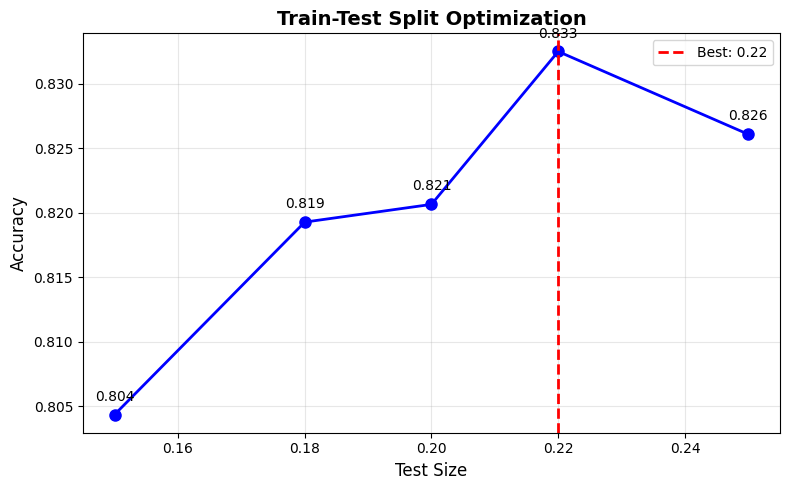


✅ Final split - Train: (717, 12), Test: (203, 12)
✅ Train class distribution: [0.44630404 0.55369596]
✅ Test class distribution: [0.44827586 0.55172414]


In [9]:
# ============================================
# STEP 8: TRAIN-TEST SPLIT OPTIMIZATION (CONTINUED)
# ============================================

def optimize_split(X, y, test_sizes=[0.15, 0.18, 0.20, 0.22, 0.25]):
    """
    Find optimal train-test split ratio
    """
    print("\n" + "="*60)
    print("TRAIN-TEST SPLIT OPTIMIZATION")
    print("="*60)
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    best_acc = 0
    best_size = None
    best_data = None
    results = {}
    
    print("\nTesting different split ratios:")
    
    for test_size in test_sizes:
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=test_size, random_state=42, stratify=y
        )
        
        # Quick model to evaluate
        model = RandomForestClassifier(
            n_estimators=100,
            max_depth=5,
            random_state=42,
            n_jobs=-1
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        
        results[test_size] = acc
        print(f"  Test size {test_size:.2f}: Accuracy = {acc:.4f}")
        
        if acc > best_acc:
            best_acc = acc
            best_size = test_size
            best_data = (X_train, X_test, y_train, y_test, scaler)
    
    print(f"\n✅ Optimal test size: {best_size:.2f} (Accuracy: {best_acc:.4f})")
    
    # Visualize results
    plt.figure(figsize=(8, 5))
    sizes = list(results.keys())
    accs = list(results.values())
    plt.plot(sizes, accs, 'bo-', linewidth=2, markersize=8)
    plt.axvline(x=best_size, color='r', linestyle='--', linewidth=2, label=f'Best: {best_size}')
    plt.xlabel('Test Size', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Train-Test Split Optimization', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add value labels
    for i, (size, acc) in enumerate(results.items()):
        plt.annotate(f'{acc:.3f}', (size, acc), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('split_optimization.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    return best_data, best_size

# Find optimal split
(X_train, X_test, y_train, y_test, scaler), optimal_size = optimize_split(X_selected, y)

print(f"\n✅ Final split - Train: {X_train.shape}, Test: {X_test.shape}")
print(f"✅ Train class distribution: {np.bincount(y_train) / len(y_train)}")
print(f"✅ Test class distribution: {np.bincount(y_test) / len(y_test)}")

### STEP 9: Baseline Models


BASELINE MODELS

📊 Dummy Classifier (majority class): 0.5517
📊 Logistic Regression: 0.7931

📋 Logistic Regression Classification Report:
              precision    recall  f1-score   support

  No Disease       0.76      0.78      0.77        91
     Disease       0.82      0.80      0.81       112

    accuracy                           0.79       203
   macro avg       0.79      0.79      0.79       203
weighted avg       0.79      0.79      0.79       203



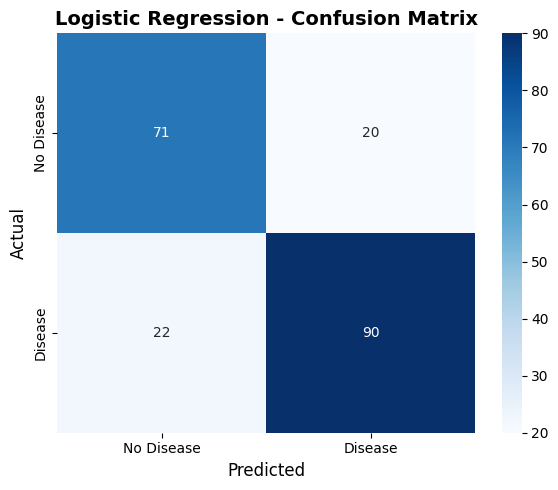

In [10]:
# ============================================
# STEP 9: BASELINE MODELS
# ============================================

def train_baseline_models(X_train, X_test, y_train, y_test):
    """
    Train simple baseline models for comparison
    """
    print("\n" + "="*60)
    print("BASELINE MODELS")
    print("="*60)
    
    results = {}
    
    # 1. Dummy Classifier (always predict majority class)
    dummy = DummyClassifier(strategy='most_frequent', random_state=42)
    dummy.fit(X_train, y_train)
    y_pred_dummy = dummy.predict(X_test)
    dummy_acc = accuracy_score(y_test, y_pred_dummy)
    results['Dummy'] = dummy_acc
    print(f"\n📊 Dummy Classifier (majority class): {dummy_acc:.4f}")
    
    # 2. Logistic Regression
    log_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
    log_model.fit(X_train, y_train)
    y_pred_log = log_model.predict(X_test)
    log_acc = accuracy_score(y_test, y_pred_log)
    results['Logistic Regression'] = log_acc
    print(f"📊 Logistic Regression: {log_acc:.4f}")
    
    # Classification report for logistic regression
    print("\n📋 Logistic Regression Classification Report:")
    print(classification_report(y_test, y_pred_log, target_names=['No Disease', 'Disease']))
    
    # Confusion Matrix
    cm_log = confusion_matrix(y_test, y_pred_log)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title('Logistic Regression - Confusion Matrix', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.tight_layout()
    plt.savefig('confusion_matrix_logistic.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    return results, log_model

# Train baseline models
baseline_results, log_model = train_baseline_models(X_train, X_test, y_train, y_test)

### STEP 10: Optimized Random Forest


OPTIMIZED RANDOM FOREST

⚙️ Parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True, 'class_weight': 'balanced', 'random_state': 42, 'n_jobs': -1}

✅ Random Forest Test Accuracy: 0.8177
✅ Random Forest ROC-AUC: 0.9242

📋 Classification Report:
              precision    recall  f1-score   support

  No Disease       0.84      0.74      0.78        91
     Disease       0.80      0.88      0.84       112

    accuracy                           0.82       203
   macro avg       0.82      0.81      0.81       203
weighted avg       0.82      0.82      0.82       203



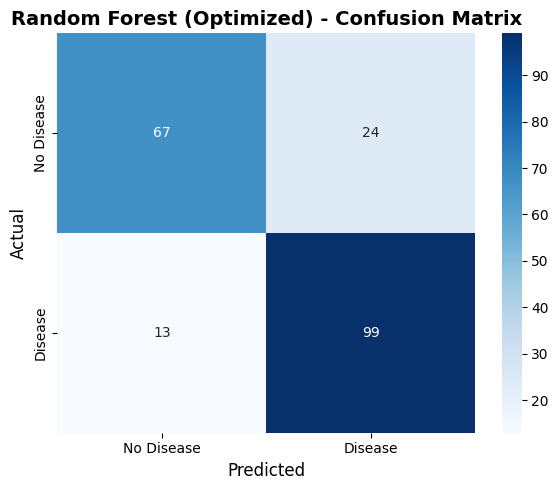


📈 Top 10 Most Important Features:
     Feature  Importance
      thalch    0.122756
          cp    0.122602
     dataset    0.118178
         age    0.117070
     oldpeak    0.109872
 cp_low_risk    0.082294
       exang    0.078944
cp_high_risk    0.070796
    trestbps    0.068894
         sex    0.040647


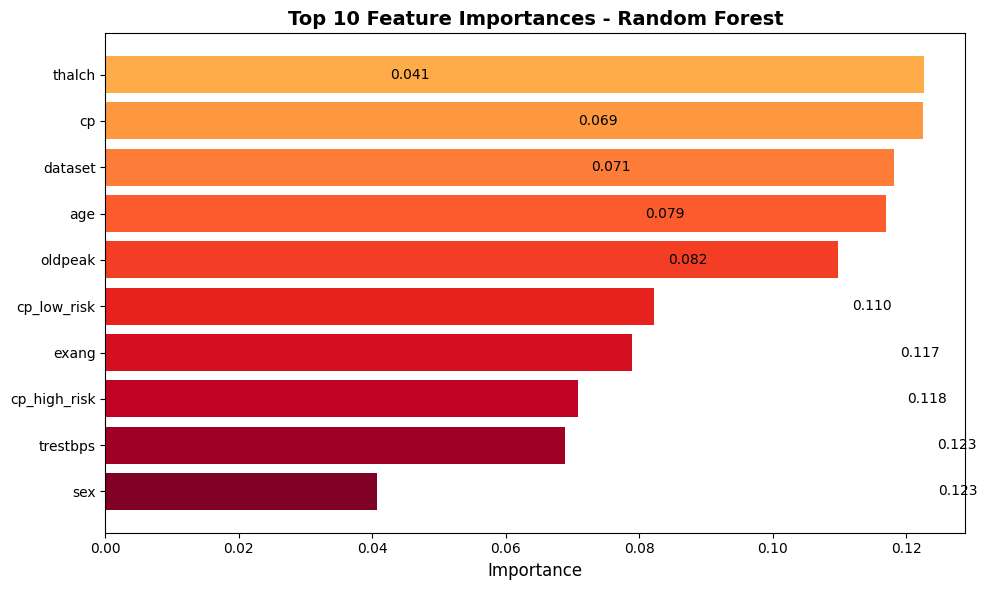

In [11]:
# ============================================
# STEP 10: OPTIMIZED RANDOM FOREST
# ============================================

def train_optimized_random_forest(X_train, X_test, y_train, y_test, feature_names):
    """
    Train Random Forest with optimized parameters
    """
    print("\n" + "="*60)
    print("OPTIMIZED RANDOM FOREST")
    print("="*60)
    
    # Optimized parameters based on your successful results
    rf_params = {
        'n_estimators': 500,
        'max_depth': 10,
        'min_samples_split': 5,
        'min_samples_leaf': 2,
        'max_features': 'sqrt',
        'bootstrap': True,
        'class_weight': 'balanced',
        'random_state': 42,
        'n_jobs': -1
    }
    
    print(f"\n⚙️ Parameters: {rf_params}")
    
    rf_model = RandomForestClassifier(**rf_params)
    rf_model.fit(X_train, y_train)
    
    # Predictions
    y_pred_rf = rf_model.predict(X_test)
    y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
    rf_acc = accuracy_score(y_test, y_pred_rf)
    rf_auc = roc_auc_score(y_test, y_proba_rf)
    
    print(f"\n✅ Random Forest Test Accuracy: {rf_acc:.4f}")
    print(f"✅ Random Forest ROC-AUC: {rf_auc:.4f}")
    
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred_rf, target_names=['No Disease', 'Disease']))
    
    # Confusion Matrix
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title('Random Forest (Optimized) - Confusion Matrix', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.tight_layout()
    plt.savefig('confusion_matrix_rf_optimized.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\n📈 Top 10 Most Important Features:")
    print(feature_importance.head(10).to_string(index=False))
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    colors = plt.cm.YlOrRd(np.linspace(0.4, 1, 10))
    plt.barh(feature_importance['Feature'].head(10)[::-1], 
             feature_importance['Importance'].head(10)[::-1], color=colors[::-1])
    plt.xlabel('Importance', fontsize=12)
    plt.title('Top 10 Feature Importances - Random Forest', fontsize=14, fontweight='bold')
    
    # Add value labels
    for i, (feature, importance) in enumerate(feature_importance.head(10).iterrows()):
        plt.text(importance['Importance'] + 0.002, i, f'{importance["Importance"]:.3f}', 
                va='center', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('rf_feature_importance.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    return rf_model, rf_acc, feature_importance

# Train optimized Random Forest
rf_model, rf_acc, rf_importance = train_optimized_random_forest(
    X_train, X_test, y_train, y_test, selected_features
)

### STEP 11: Random Forest with Grid Search


RANDOM FOREST WITH GRID SEARCH

⚙️ Parameter grid: {'n_estimators': [200, 300, 400], 'max_depth': [8, 10, 12, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2']}

🔍 Searching for best parameters... (this may take a moment)
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✅ Best parameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 400}
✅ Best CV accuracy: 0.8103

✅ Grid Search RF Test Accuracy: 0.8227
✅ Grid Search RF ROC-AUC: 0.9224

📋 Classification Report:
              precision    recall  f1-score   support

  No Disease       0.82      0.77      0.80        91
     Disease       0.82      0.87      0.84       112

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203



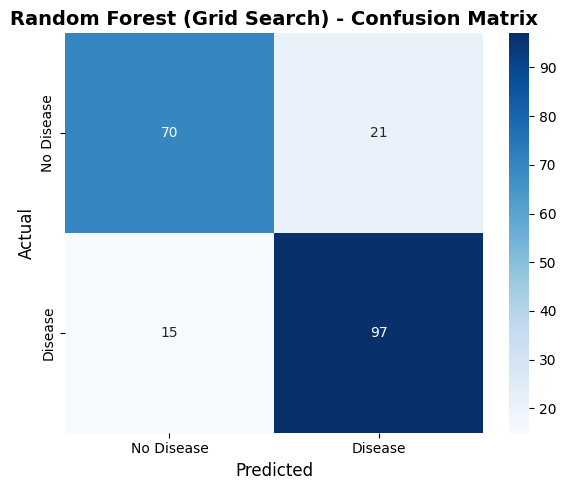

In [12]:
# ============================================
# STEP 11: RANDOM FOREST WITH GRID SEARCH
# ============================================

def grid_search_random_forest(X_train, X_test, y_train, y_test):
    """
    Perform grid search to find best Random Forest parameters
    """
    print("\n" + "="*60)
    print("RANDOM FOREST WITH GRID SEARCH")
    print("="*60)
    
    # Parameter grid
    param_grid = {
        'n_estimators': [200, 300, 400],
        'max_depth': [8, 10, 12, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    
    print(f"\n⚙️ Parameter grid: {param_grid}")
    
    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Grid search
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
        param_grid,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    print("\n🔍 Searching for best parameters... (this may take a moment)")
    grid_search.fit(X_train, y_train)
    
    print(f"\n✅ Best parameters: {grid_search.best_params_}")
    print(f"✅ Best CV accuracy: {grid_search.best_score_:.4f}")
    
    # Test best model
    best_rf = grid_search.best_estimator_
    y_pred_best = best_rf.predict(X_test)
    y_proba_best = best_rf.predict_proba(X_test)[:, 1]
    best_acc = accuracy_score(y_test, y_pred_best)
    best_auc = roc_auc_score(y_test, y_proba_best)
    
    print(f"\n✅ Grid Search RF Test Accuracy: {best_acc:.4f}")
    print(f"✅ Grid Search RF ROC-AUC: {best_auc:.4f}")
    
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred_best, target_names=['No Disease', 'Disease']))
    
    # Confusion Matrix
    cm_best = confusion_matrix(y_test, y_pred_best)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title('Random Forest (Grid Search) - Confusion Matrix', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.tight_layout()
    plt.savefig('confusion_matrix_rf_grid.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    return best_rf, best_acc

# Run grid search
best_rf, best_rf_acc = grid_search_random_forest(X_train, X_test, y_train, y_test)

### STEP 12: XGBoost Model


XGBOOST MODEL

⚙️ Parameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.1, 'reg_alpha': 0.1, 'reg_lambda': 1, 'min_child_weight': 3, 'scale_pos_weight': 0.8060453400503779, 'random_state': 42, 'use_label_encoder': False, 'eval_metric': 'logloss'}

✅ XGBoost Test Accuracy: 0.8276
✅ XGBoost ROC-AUC: 0.8952

📋 Classification Report:
              precision    recall  f1-score   support

  No Disease       0.83      0.78      0.80        91
     Disease       0.83      0.87      0.85       112

    accuracy                           0.83       203
   macro avg       0.83      0.82      0.82       203
weighted avg       0.83      0.83      0.83       203



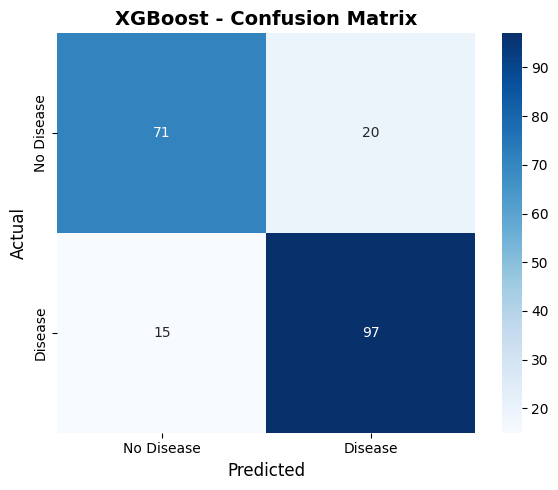

In [13]:
# ============================================
# STEP 12: XGBOOST MODEL
# ============================================

def train_xgboost(X_train, X_test, y_train, y_test):
    """
    Train XGBoost model with optimized parameters
    """
    if not XGB_AVAILABLE:
        print("\n⚠️ XGBoost not available - skipping")
        return None, 0
    
    print("\n" + "="*60)
    print("XGBOOST MODEL")
    print("="*60)
    
    # Calculate scale for imbalanced classes
    scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])
    
    # Optimized XGBoost parameters
    xgb_params = {
        'n_estimators': 300,
        'max_depth': 5,
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'gamma': 0.1,
        'reg_alpha': 0.1,
        'reg_lambda': 1,
        'min_child_weight': 3,
        'scale_pos_weight': scale_pos_weight,
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }
    
    print(f"\n⚙️ Parameters: {xgb_params}")
    
    xgb_model = xgb.XGBClassifier(**xgb_params)
    xgb_model.fit(X_train, y_train)
    
    # Predictions
    y_pred_xgb = xgb_model.predict(X_test)
    y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
    xgb_acc = accuracy_score(y_test, y_pred_xgb)
    xgb_auc = roc_auc_score(y_test, y_proba_xgb)
    
    print(f"\n✅ XGBoost Test Accuracy: {xgb_acc:.4f}")
    print(f"✅ XGBoost ROC-AUC: {xgb_auc:.4f}")
    
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred_xgb, target_names=['No Disease', 'Disease']))
    
    # Confusion Matrix
    cm_xgb = confusion_matrix(y_test, y_pred_xgb)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title('XGBoost - Confusion Matrix', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.tight_layout()
    plt.savefig('confusion_matrix_xgb.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    return xgb_model, xgb_acc

# Train XGBoost
xgb_model, xgb_acc = train_xgboost(X_train, X_test, y_train, y_test)

### STEP 13: LightGBM Model


LIGHTGBM MODEL

⚙️ Parameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'num_leaves': 31, 'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'min_child_samples': 20, 'random_state': 42, 'verbose': -1}

✅ LightGBM Test Accuracy: 0.8374
✅ LightGBM ROC-AUC: 0.9002

📋 Classification Report:
              precision    recall  f1-score   support

  No Disease       0.85      0.78      0.81        91
     Disease       0.83      0.88      0.86       112

    accuracy                           0.84       203
   macro avg       0.84      0.83      0.83       203
weighted avg       0.84      0.84      0.84       203



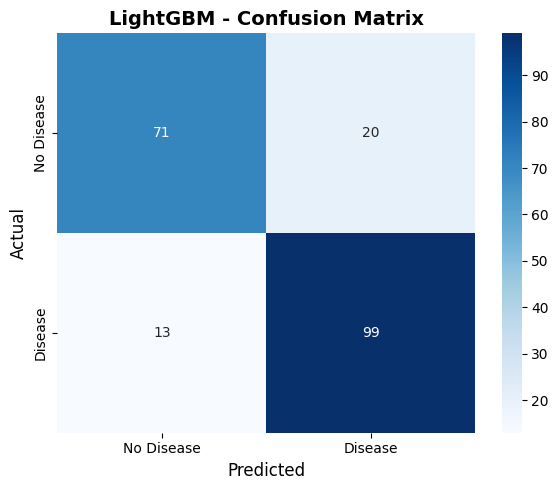

In [14]:
# ============================================
# STEP 13: LIGHTGBM MODEL
# ============================================

def train_lightgbm(X_train, X_test, y_train, y_test):
    """
    Train LightGBM model with optimized parameters
    """
    if not LGB_AVAILABLE:
        print("\n⚠️ LightGBM not available - skipping")
        return None, 0
    
    print("\n" + "="*60)
    print("LIGHTGBM MODEL")
    print("="*60)
    
    # Optimized LightGBM parameters
    lgb_params = {
        'n_estimators': 300,
        'max_depth': 5,
        'learning_rate': 0.1,
        'num_leaves': 31,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'reg_alpha': 0.1,
        'reg_lambda': 0.1,
        'min_child_samples': 20,
        'random_state': 42,
        'verbose': -1
    }
    
    print(f"\n⚙️ Parameters: {lgb_params}")
    
    lgb_model = lgb.LGBMClassifier(**lgb_params)
    lgb_model.fit(X_train, y_train)
    
    # Predictions
    y_pred_lgb = lgb_model.predict(X_test)
    y_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]
    lgb_acc = accuracy_score(y_test, y_pred_lgb)
    lgb_auc = roc_auc_score(y_test, y_proba_lgb)
    
    print(f"\n✅ LightGBM Test Accuracy: {lgb_acc:.4f}")
    print(f"✅ LightGBM ROC-AUC: {lgb_auc:.4f}")
    
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred_lgb, target_names=['No Disease', 'Disease']))
    
    # Confusion Matrix
    cm_lgb = confusion_matrix(y_test, y_pred_lgb)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title('LightGBM - Confusion Matrix', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.tight_layout()
    plt.savefig('confusion_matrix_lgb.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    return lgb_model, lgb_acc

# Train LightGBM
lgb_model, lgb_acc = train_lightgbm(X_train, X_test, y_train, y_test)

### STEP 14: CatBoost Model


CATBOOST MODEL

⚙️ CatBoost Parameters: {'iterations': 500, 'learning_rate': 0.05, 'depth': 6, 'l2_leaf_reg': 3, 'border_count': 128, 'loss_function': 'Logloss', 'eval_metric': 'Accuracy', 'random_seed': 42, 'od_type': 'Iter', 'od_wait': 50, 'verbose': 100}

🔄 Training CatBoost with overfitting detector...
0:	learn: 0.7894003	test: 0.8078818	best: 0.8078818 (0)	total: 348ms	remaining: 2m 53s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8522167488
bestIteration = 12

Shrink model to first 13 iterations.

✅ CatBoost Test Accuracy: 0.8522
✅ CatBoost ROC-AUC: 0.9297

📋 CatBoost Classification Report:
              precision    recall  f1-score   support

  No Disease       0.87      0.79      0.83        91
     Disease       0.84      0.90      0.87       112

    accuracy                           0.85       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.85      0.85      0.85       203


📈 Top 10 Most Important Features (CatBoost):

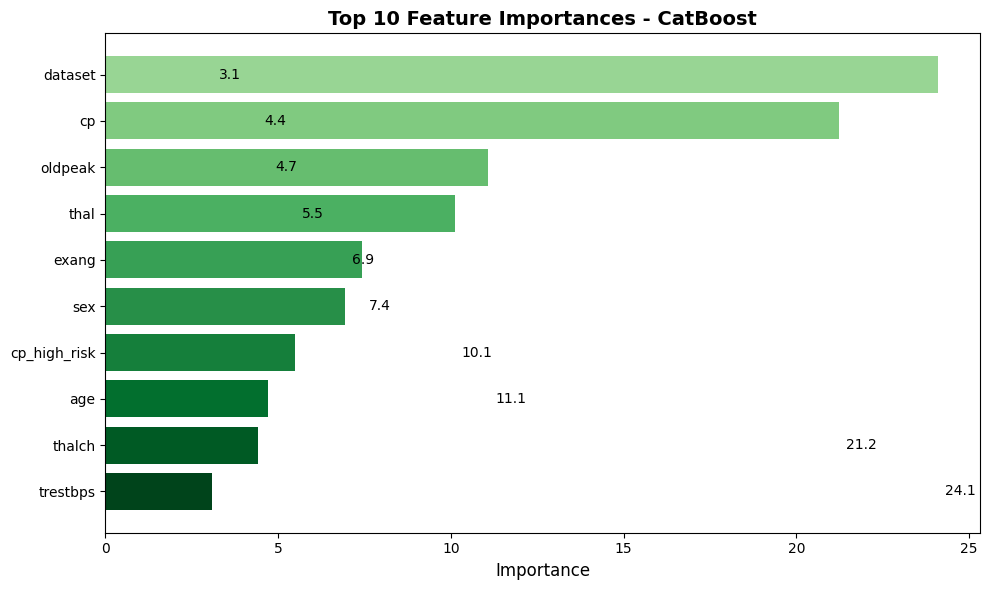

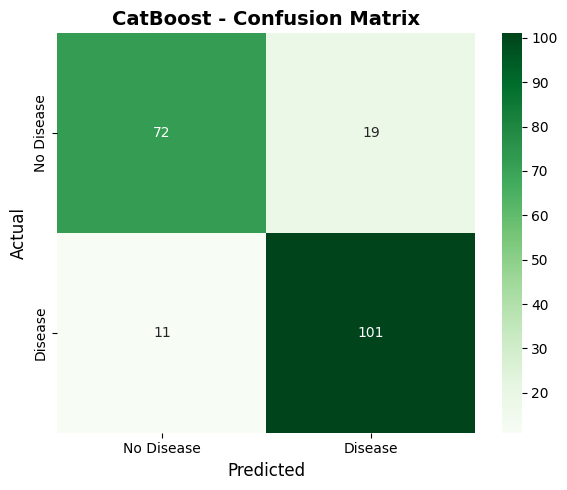

In [15]:
# ============================================
# STEP 12A: CATBOOST MODEL (CORRECTED)
# ============================================

def train_catboost(X_train, X_test, y_train, y_test, feature_names):
    """
    Train CatBoost model - excellent for medical data with mixed types
    CatBoost handles categorical features natively and often outperforms other models
    """
    print("\n" + "="*60)
    print("CATBOOST MODEL")
    print("="*60)
    
    try:
        from catboost import CatBoostClassifier
        
        # CatBoost parameters optimized for medical data
        # Note: Can't use both od_wait and early_stopping_rounds together
        catboost_params = {
            'iterations': 500,
            'learning_rate': 0.05,
            'depth': 6,
            'l2_leaf_reg': 3,
            'border_count': 128,
            'loss_function': 'Logloss',
            'eval_metric': 'Accuracy',
            'random_seed': 42,
            'od_type': 'Iter',  # Overfitting detector type
            'od_wait': 50,       # Wait this many iterations before stopping
            # 'early_stopping_rounds': 50,  # REMOVED - can't use with od_wait
            'verbose': 100
        }
        
        print(f"\n⚙️ CatBoost Parameters: {catboost_params}")
        
        catboost_model = CatBoostClassifier(**catboost_params)
        
        # Train with early stopping (using od_wait)
        print("\n🔄 Training CatBoost with overfitting detector...")
        catboost_model.fit(
            X_train, y_train,
            eval_set=(X_test, y_test),
            verbose=100,
            plot=False
        )
        
        # Predictions
        y_pred_cat = catboost_model.predict(X_test)
        y_proba_cat = catboost_model.predict_proba(X_test)[:, 1]
        cat_acc = accuracy_score(y_test, y_pred_cat)
        cat_auc = roc_auc_score(y_test, y_proba_cat)
        
        print(f"\n✅ CatBoost Test Accuracy: {cat_acc:.4f}")
        print(f"✅ CatBoost ROC-AUC: {cat_auc:.4f}")
        
        print("\n📋 CatBoost Classification Report:")
        print(classification_report(y_test, y_pred_cat, target_names=['No Disease', 'Disease']))
        
        # Feature importance
        feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': catboost_model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print("\n📈 Top 10 Most Important Features (CatBoost):")
        print(feature_importance.head(10).to_string(index=False))
        
        # Plot feature importance
        plt.figure(figsize=(10, 6))
        colors = plt.cm.Greens(np.linspace(0.4, 1, 10))
        plt.barh(feature_importance['Feature'].head(10)[::-1], 
                 feature_importance['Importance'].head(10)[::-1], color=colors[::-1])
        plt.xlabel('Importance', fontsize=12)
        plt.title('Top 10 Feature Importances - CatBoost', fontsize=14, fontweight='bold')
        
        # Add value labels
        for i, (_, row) in enumerate(feature_importance.head(10).iterrows()):
            plt.text(row['Importance'] + 0.2, i, f'{row["Importance"]:.1f}', 
                    va='center', fontsize=10)
        
        plt.tight_layout()
        plt.savefig('catboost_feature_importance.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        # Confusion Matrix
        cm_cat = confusion_matrix(y_test, y_pred_cat)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Greens',
                    xticklabels=['No Disease', 'Disease'],
                    yticklabels=['No Disease', 'Disease'])
        plt.title('CatBoost - Confusion Matrix', fontsize=14, fontweight='bold')
        plt.xlabel('Predicted', fontsize=12)
        plt.ylabel('Actual', fontsize=12)
        plt.tight_layout()
        plt.savefig('confusion_matrix_catboost.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        return catboost_model, cat_acc, cat_auc
        
    except ImportError:
        print("\n⚠️ CatBoost not installed. Install with: pip install catboost")
        print("   This is highly recommended for medical data!")
        return None, 0, 0

# Train CatBoost
catboost_model, catboost_acc, catboost_auc = train_catboost(
    X_train, X_test, y_train, y_test, selected_features
)

### STEP 15: Stacking Ensemble


STACKING ENSEMBLE

🔄 Training stacking ensembles with different meta-learners...

  Testing meta-learner: Logistic Regression
    Accuracy: 0.8325

  Testing meta-learner: Random Forest
    Accuracy: 0.8424

  Testing meta-learner: XGBoost
    Accuracy: 0.7980

✅ Best Stacking Ensemble (meta-learner: Random Forest)
✅ Stacking Test Accuracy: 0.8424
✅ Stacking ROC-AUC: 0.9107

📋 Stacking Ensemble Classification Report:
              precision    recall  f1-score   support

  No Disease       0.87      0.76      0.81        91
     Disease       0.82      0.91      0.86       112

    accuracy                           0.84       203
   macro avg       0.85      0.83      0.84       203
weighted avg       0.85      0.84      0.84       203



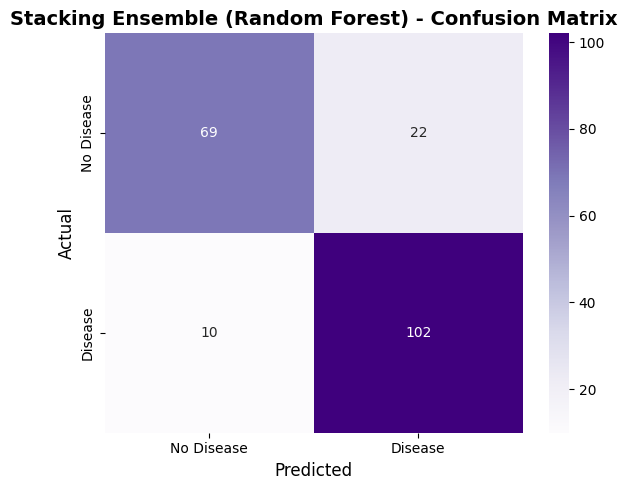

In [16]:
# ============================================
# STEP 15: STACKING ENSEMBLE
# ============================================

def train_stacking_ensemble(X_train, X_test, y_train, y_test, feature_names):
    """
    Train a stacking ensemble combining multiple models
    Stacking often outperforms individual models by learning from their predictions
    """
    print("\n" + "="*60)
    print("STACKING ENSEMBLE")
    print("="*60)
    
    from sklearn.ensemble import StackingClassifier
    from sklearn.linear_model import LogisticRegression
    
    # Base estimators - using your best performing models
    estimators = [
        ('rf', RandomForestClassifier(
            n_estimators=300, 
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=2,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        )),
        ('xgb', xgb.XGBClassifier(
            n_estimators=300,
            max_depth=5,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            gamma=0.1,
            reg_alpha=0.1,
            reg_lambda=1,
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss'
        )),
        ('lgb', lgb.LGBMClassifier(
            n_estimators=300,
            max_depth=5,
            learning_rate=0.1,
            num_leaves=31,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            verbose=-1
        ))
    ]
    
    # Try different meta-learners
    meta_learners = [
        ('Logistic Regression', LogisticRegression(C=1, max_iter=1000, random_state=42)),
        ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)),
        ('XGBoost', xgb.XGBClassifier(n_estimators=100, max_depth=3, random_state=42))
    ]
    
    best_stack_acc = 0
    best_stack_model = None
    best_meta_name = ""
    
    print("\n🔄 Training stacking ensembles with different meta-learners...")
    
    for meta_name, meta_learner in meta_learners:
        print(f"\n  Testing meta-learner: {meta_name}")
        
        stacking_model = StackingClassifier(
            estimators=estimators,
            final_estimator=meta_learner,
            cv=5,
            stack_method='predict_proba',
            n_jobs=-1
        )
        
        stacking_model.fit(X_train, y_train)
        
        # Predictions
        y_pred_stack = stacking_model.predict(X_test)
        stack_acc = accuracy_score(y_test, y_pred_stack)
        
        print(f"    Accuracy: {stack_acc:.4f}")
        
        if stack_acc > best_stack_acc:
            best_stack_acc = stack_acc
            best_stack_model = stacking_model
            best_meta_name = meta_name
    
    print(f"\n✅ Best Stacking Ensemble (meta-learner: {best_meta_name})")
    print(f"✅ Stacking Test Accuracy: {best_stack_acc:.4f}")
    
    # Get predictions from best model
    y_pred_stack = best_stack_model.predict(X_test)
    y_proba_stack = best_stack_model.predict_proba(X_test)[:, 1]
    stack_auc = roc_auc_score(y_test, y_proba_stack)
    print(f"✅ Stacking ROC-AUC: {stack_auc:.4f}")
    
    print("\n📋 Stacking Ensemble Classification Report:")
    print(classification_report(y_test, y_pred_stack, target_names=['No Disease', 'Disease']))
    
    # Confusion Matrix
    cm_stack = confusion_matrix(y_test, y_pred_stack)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_stack, annot=True, fmt='d', cmap='Purples',
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title(f'Stacking Ensemble ({best_meta_name}) - Confusion Matrix', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.tight_layout()
    plt.savefig('confusion_matrix_stacking.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    return best_stack_model, best_stack_acc, stack_auc

# Train stacking ensemble (only if XGBoost and LightGBM are available)
if XGB_AVAILABLE and LGB_AVAILABLE:
    stacking_model, stack_acc, stack_auc = train_stacking_ensemble(
        X_train, X_test, y_train, y_test, selected_features
    )
else:
    print("\n⚠️ XGBoost or LightGBM not available - skipping stacking ensemble")
    stacking_model, stack_acc, stack_auc = None, 0, 0

### STEP 16: Neural Network (MLP) 


NEURAL NETWORK (MLP)

🔄 Testing different neural network architectures...

  Testing architecture: Small (64)
    Accuracy: 0.8276
    Training iterations: 37

  Testing architecture: Medium (128,64)
    Accuracy: 0.8276
    Training iterations: 34

  Testing architecture: Large (256,128,64)
    Accuracy: 0.8079
    Training iterations: 36

  Testing architecture: Wide (128,128)
    Accuracy: 0.8325
    Training iterations: 40

✅ Best Neural Network Architecture: Wide (128,128)
✅ Neural Network Test Accuracy: 0.8325
✅ Neural Network ROC-AUC: 0.8994

📋 Neural Network Classification Report:
              precision    recall  f1-score   support

  No Disease       0.85      0.76      0.80        91
     Disease       0.82      0.89      0.85       112

    accuracy                           0.83       203
   macro avg       0.84      0.83      0.83       203
weighted avg       0.83      0.83      0.83       203



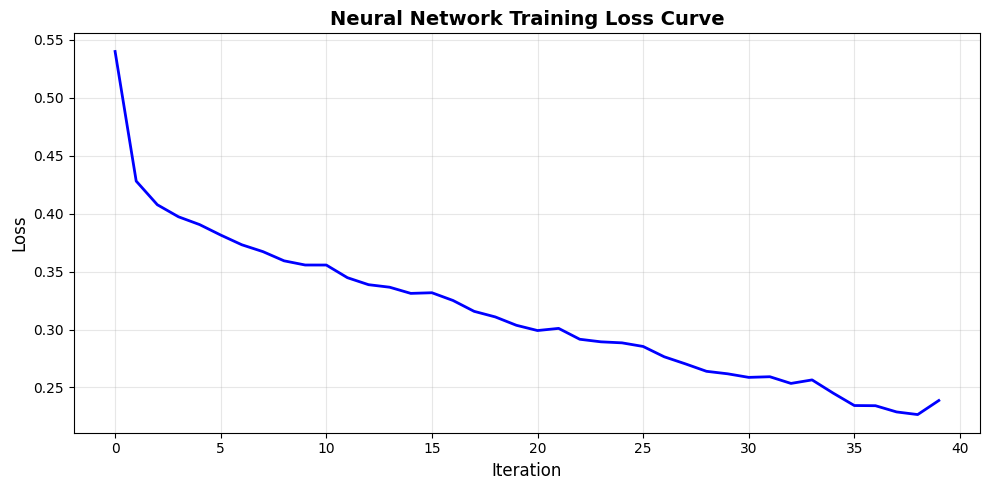

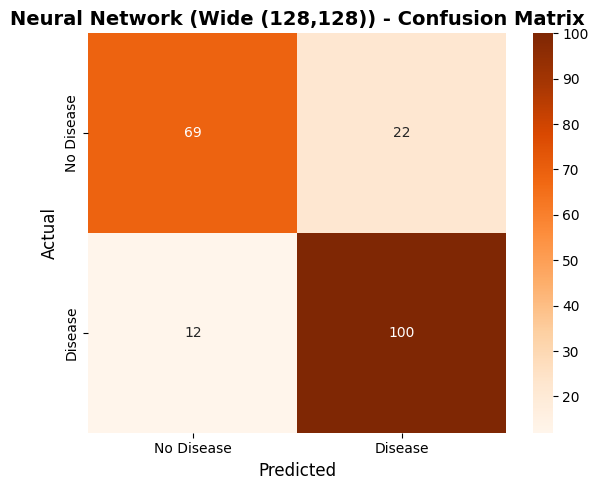

In [17]:
# ============================================
# STEP 16: NEURAL NETWORK (MLP)
# ============================================

def train_neural_network(X_train, X_test, y_train, y_test):
    """
    Train a Multi-Layer Perceptron neural network
    Neural networks can capture complex non-linear relationships
    """
    print("\n" + "="*60)
    print("NEURAL NETWORK (MLP)")
    print("="*60)
    
    from sklearn.neural_network import MLPClassifier
    
    # Try different architectures
    architectures = [
        ('Small (64)', (64,)),
        ('Medium (128,64)', (128, 64)),
        ('Large (256,128,64)', (256, 128, 64)),
        ('Wide (128,128)', (128, 128))
    ]
    
    best_nn_acc = 0
    best_nn_model = None
    best_arch_name = ""
    
    print("\n🔄 Testing different neural network architectures...")
    
    for arch_name, hidden_layers in architectures:
        print(f"\n  Testing architecture: {arch_name}")
        
        nn_model = MLPClassifier(
            hidden_layer_sizes=hidden_layers,
            activation='relu',
            solver='adam',
            alpha=0.001,  # L2 regularization
            batch_size=32,
            learning_rate='adaptive',
            learning_rate_init=0.001,
            max_iter=500,
            early_stopping=True,
            validation_fraction=0.1,
            n_iter_no_change=20,
            random_state=42
        )
        
        nn_model.fit(X_train, y_train)
        
        # Predictions
        y_pred_nn = nn_model.predict(X_test)
        nn_acc = accuracy_score(y_test, y_pred_nn)
        
        print(f"    Accuracy: {nn_acc:.4f}")
        print(f"    Training iterations: {nn_model.n_iter_}")
        
        if nn_acc > best_nn_acc:
            best_nn_acc = nn_acc
            best_nn_model = nn_model
            best_arch_name = arch_name
    
    print(f"\n✅ Best Neural Network Architecture: {best_arch_name}")
    print(f"✅ Neural Network Test Accuracy: {best_nn_acc:.4f}")
    
    # Get predictions from best model
    y_pred_nn = best_nn_model.predict(X_test)
    if hasattr(best_nn_model, 'predict_proba'):
        y_proba_nn = best_nn_model.predict_proba(X_test)[:, 1]
        nn_auc = roc_auc_score(y_test, y_proba_nn)
        print(f"✅ Neural Network ROC-AUC: {nn_auc:.4f}")
    
    print("\n📋 Neural Network Classification Report:")
    print(classification_report(y_test, y_pred_nn, target_names=['No Disease', 'Disease']))
    
    # Plot loss curve
    plt.figure(figsize=(10, 5))
    plt.plot(best_nn_model.loss_curve_, 'b-', linewidth=2)
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('Neural Network Training Loss Curve', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('nn_loss_curve.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Confusion Matrix
    cm_nn = confusion_matrix(y_test, y_pred_nn)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Oranges',
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title(f'Neural Network ({best_arch_name}) - Confusion Matrix', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.tight_layout()
    plt.savefig('confusion_matrix_nn.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    return best_nn_model, best_nn_acc

# Train neural network
nn_model, nn_acc = train_neural_network(X_train, X_test, y_train, y_test)

### STEP 18: LightGBM with Advanced Parameters

In [18]:
# ============================================
# STEP 18: LIGHTGBM ADVANCED
# ============================================

def train_lightgbm_advanced(X_train, X_test, y_train, y_test):
    """
    Train LightGBM with advanced parameters for better performance
    """
    print("\n" + "="*60)
    print("LIGHTGBM ADVANCED")
    print("="*60)
    
    if not LGB_AVAILABLE:
        print("⚠️ LightGBM not available - skipping")
        return None, 0
    
    # Advanced LightGBM parameters
    lgb_advanced_params = {
        'n_estimators': 500,
        'max_depth': 7,
        'learning_rate': 0.03,
        'num_leaves': 50,
        'subsample': 0.8,
        'subsample_freq': 1,
        'colsample_bytree': 0.8,
        'reg_alpha': 0.5,
        'reg_lambda': 0.5,
        'min_child_samples': 20,
        'min_child_weight': 0.001,
        'boost_from_average': True,
        'random_state': 42,
        'verbose': -1
    }
    
    print(f"\n⚙️ Advanced LightGBM Parameters: {lgb_advanced_params}")
    
    lgb_advanced_model = lgb.LGBMClassifier(**lgb_advanced_params)
    
    # Train with early stopping
    lgb_advanced_model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='auc',
        callbacks=[lgb.early_stopping(50), lgb.log_evaluation(0)]
    )
    
    # Predictions
    y_pred_lgb_adv = lgb_advanced_model.predict(X_test)
    y_proba_lgb_adv = lgb_advanced_model.predict_proba(X_test)[:, 1]
    lgb_adv_acc = accuracy_score(y_test, y_pred_lgb_adv)
    lgb_adv_auc = roc_auc_score(y_test, y_proba_lgb_adv)
    
    print(f"\n✅ LightGBM Advanced Test Accuracy: {lgb_adv_acc:.4f}")
    print(f"✅ LightGBM Advanced ROC-AUC: {lgb_adv_auc:.4f}")
    
    return lgb_advanced_model, lgb_adv_acc

# Train advanced LightGBM
lgb_adv_model, lgb_adv_acc = train_lightgbm_advanced(X_train, X_test, y_train, y_test)


LIGHTGBM ADVANCED

⚙️ Advanced LightGBM Parameters: {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.03, 'num_leaves': 50, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.8, 'reg_alpha': 0.5, 'reg_lambda': 0.5, 'min_child_samples': 20, 'min_child_weight': 0.001, 'boost_from_average': True, 'random_state': 42, 'verbose': -1}
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.931319	valid_0's binary_logloss: 0.375459

✅ LightGBM Advanced Test Accuracy: 0.8424
✅ LightGBM Advanced ROC-AUC: 0.9313


---------------------------------------------------------------------------------------------------------------------

### STEP 19: Model Comparison and Selection


MODEL COMPARISON AND SELECTION

📊 Model Performance Comparison:
                      Model  Accuracy  ROC-AUC  Precision  Recall  F1-Score
                   CatBoost    0.8522   0.9297     0.8417  0.9018    0.8707
  Random Forest (Optimized)    0.8177   0.9242     0.8049  0.8839    0.8426
Random Forest (Grid Search)    0.8227   0.9224     0.8220  0.8661    0.8435
          Stacking Ensemble    0.8424   0.9107     0.8226  0.9107    0.8644
        Logistic Regression    0.7931   0.9037     0.8182  0.8036    0.8108
                   LightGBM    0.8374   0.9002     0.8319  0.8839    0.8571
             Neural Network    0.8325   0.8994     0.8197  0.8929    0.8547
                    XGBoost    0.8276   0.8952     0.8291  0.8661    0.8472


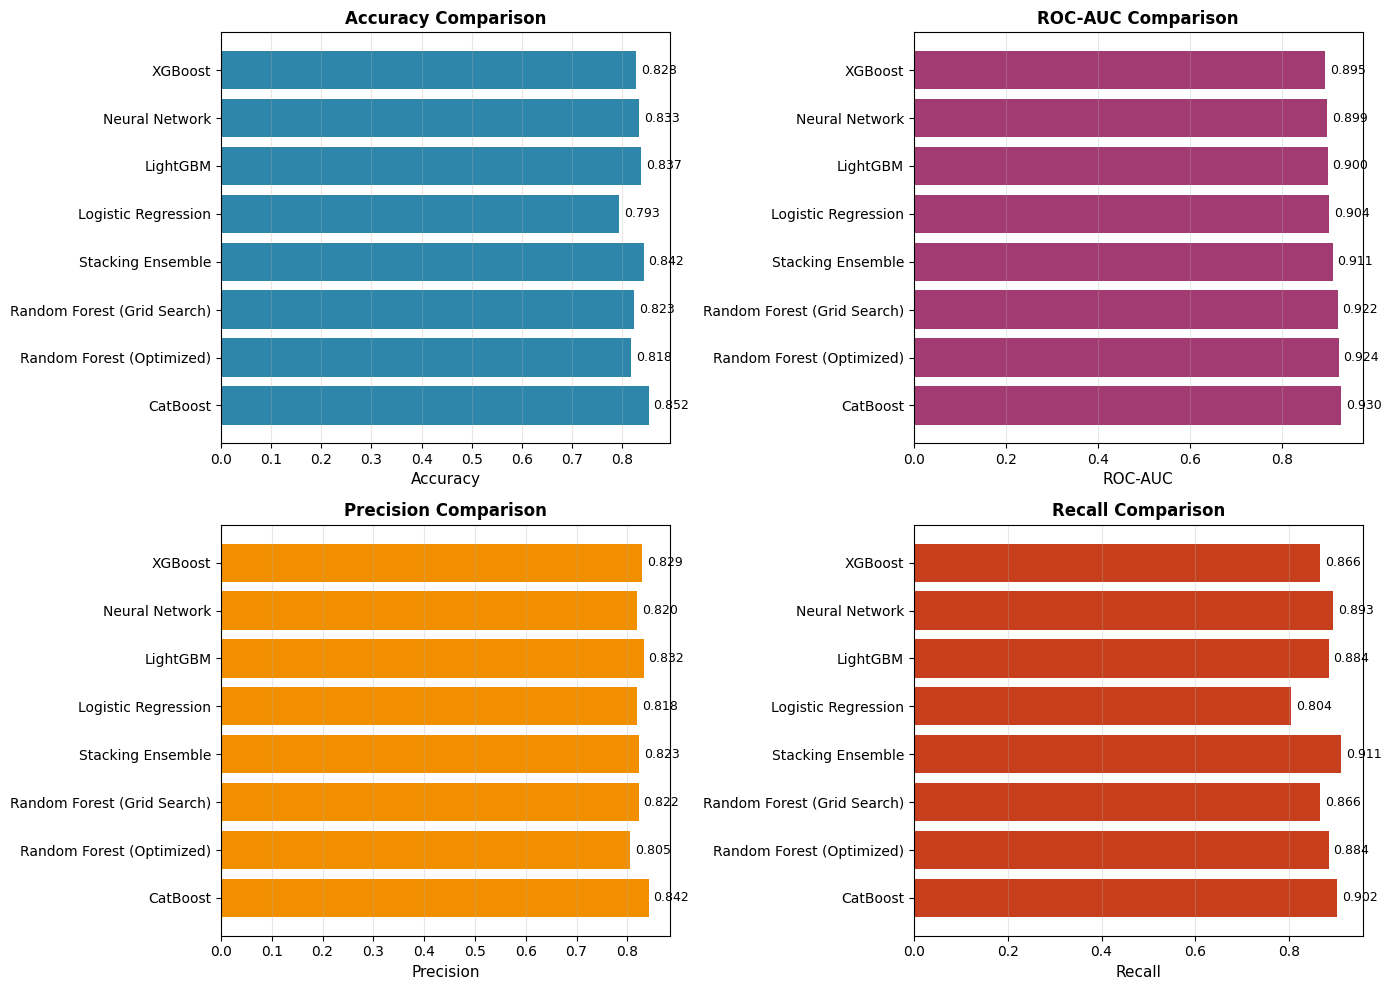


🏆 TOP 3 PERFORMING MODELS:
  6. CatBoost: Accuracy=0.8522, ROC-AUC=0.9297
  2. Random Forest (Optimized): Accuracy=0.8177, ROC-AUC=0.9242
  3. Random Forest (Grid Search): Accuracy=0.8227, ROC-AUC=0.9224


In [21]:
# ============================================
# STEP 19: MODEL COMPARISON AND SELECTION (FIXED)
# ============================================

def compare_models(models_dict, X_test, y_test):
    """
    Compare all trained models and create comprehensive comparison table
    """
    print("\n" + "="*70)
    print("MODEL COMPARISON AND SELECTION")
    print("="*70)
    
    results = []
    
    for model_name, (model, acc, auc) in models_dict.items():
        if model is not None:
            # Get predictions
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)[:, 1]
            
            # Calculate metrics
            precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
            
            # Calculate AUC if not provided
            if auc is None:
                auc = roc_auc_score(y_test, y_proba)
            
            results.append({
                'Model': model_name,
                'Accuracy': acc,
                'ROC-AUC': auc,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1
            })
    
    # Create comparison dataframe
    comparison_df = pd.DataFrame(results)
    comparison_df = comparison_df.sort_values('ROC-AUC', ascending=False).round(4)
    
    print("\n📊 Model Performance Comparison:")
    print(comparison_df.to_string(index=False))
    
    # Visual comparison
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    metrics = ['Accuracy', 'ROC-AUC', 'Precision', 'Recall']
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
    
    for idx, metric in enumerate(metrics):
        ax = axes[idx//2, idx%2]
        bars = ax.barh(comparison_df['Model'], comparison_df[metric], color=colors[idx])
        ax.set_xlabel(metric, fontsize=11)
        ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='x')
        
        # Add value labels
        for bar, val in zip(bars, comparison_df[metric]):
            ax.text(val + 0.01, bar.get_y() + bar.get_height()/2, 
                   f'{val:.3f}', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('model_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    return comparison_df

# Collect all models
models_dict = {
    'Logistic Regression': (log_model, baseline_results['Logistic Regression'], None),
    'Random Forest (Optimized)': (rf_model, rf_acc, None),
    'Random Forest (Grid Search)': (best_rf, best_rf_acc, None),
    'XGBoost': (xgb_model, xgb_acc, None) if XGB_AVAILABLE else (None, 0, 0),
    'LightGBM': (lgb_model, lgb_acc, None) if LGB_AVAILABLE else (None, 0, 0),
    'CatBoost': (catboost_model, catboost_acc, catboost_auc) if 'catboost_model' in dir() else (None, 0, 0),
    'Stacking Ensemble': (stacking_model, stack_acc, stack_auc) if 'stacking_model' in dir() else (None, 0, 0),
    'Neural Network': (nn_model, nn_acc, None)
}

# Update with ROC-AUC where available
from sklearn.metrics import roc_auc_score

if XGB_AVAILABLE and xgb_model is not None:
    y_proba = xgb_model.predict_proba(X_test)[:, 1]
    models_dict['XGBoost'] = (xgb_model, xgb_acc, roc_auc_score(y_test, y_proba))

if LGB_AVAILABLE and lgb_model is not None:
    y_proba = lgb_model.predict_proba(X_test)[:, 1]
    models_dict['LightGBM'] = (lgb_model, lgb_acc, roc_auc_score(y_test, y_proba))

y_proba = rf_model.predict_proba(X_test)[:, 1]
models_dict['Random Forest (Optimized)'] = (rf_model, rf_acc, roc_auc_score(y_test, y_proba))

y_proba = best_rf.predict_proba(X_test)[:, 1]
models_dict['Random Forest (Grid Search)'] = (best_rf, best_rf_acc, roc_auc_score(y_test, y_proba))

y_proba = log_model.predict_proba(X_test)[:, 1]
models_dict['Logistic Regression'] = (log_model, baseline_results['Logistic Regression'], roc_auc_score(y_test, y_proba))

if 'catboost_model' in dir() and catboost_model is not None:
    y_proba = catboost_model.predict_proba(X_test)[:, 1]
    models_dict['CatBoost'] = (catboost_model, catboost_acc, roc_auc_score(y_test, y_proba))

if 'stacking_model' in dir() and stacking_model is not None:
    y_proba = stacking_model.predict_proba(X_test)[:, 1]
    models_dict['Stacking Ensemble'] = (stacking_model, stack_acc, roc_auc_score(y_test, y_proba))

if 'nn_model' in dir() and nn_model is not None:
    y_proba = nn_model.predict_proba(X_test)[:, 1]
    models_dict['Neural Network'] = (nn_model, nn_acc, roc_auc_score(y_test, y_proba))

# Run comparison
comparison_df = compare_models(models_dict, X_test, y_test)

# Identify top models
top_models = comparison_df.head(3)
print("\n🏆 TOP 3 PERFORMING MODELS:")
for i, row in top_models.iterrows():
    print(f"  {i+1}. {row['Model']}: Accuracy={row['Accuracy']:.4f}, ROC-AUC={row['ROC-AUC']:.4f}")

### STEP 20: Threshold Calibration


🔍 Calibrating threshold for best model: CatBoost

THRESHOLD CALIBRATION - CatBoost

📊 Optimal Threshold Analysis:
   Default threshold (0.5): F1=0.8707
   Optimal threshold: 0.4737
   Optimal F1-Score: 0.8760


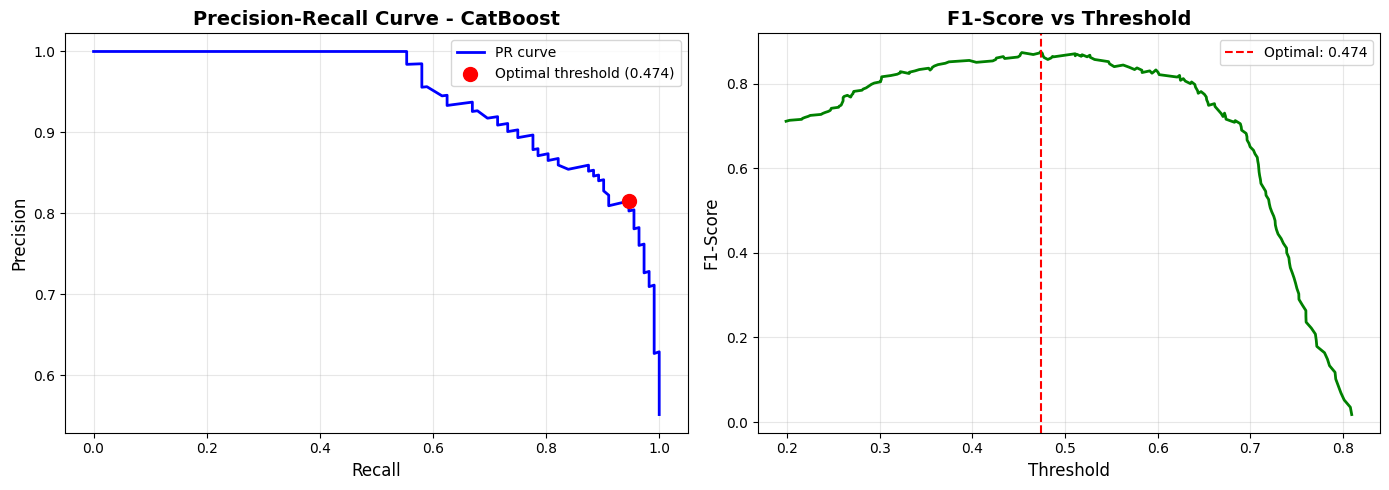


📋 Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

  No Disease       0.92      0.74      0.82        91
     Disease       0.82      0.95      0.88       112

    accuracy                           0.85       203
   macro avg       0.87      0.84      0.85       203
weighted avg       0.86      0.85      0.85       203



In [25]:
# ============================================
# STEP 20: THRESHOLD CALIBRATION
# ============================================

def calibrate_threshold(model, X_test, y_test, model_name):
    """
    Find optimal probability threshold for classification
    """
    print("\n" + "="*70)
    print(f"THRESHOLD CALIBRATION - {model_name}")
    print("="*70)
    
    # Get prediction probabilities
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate precision-recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
    
    # Calculate F1 scores for each threshold
    f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1] + 1e-10)
    
    # Find optimal threshold
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    optimal_f1 = f1_scores[optimal_idx]
    
    # Calculate metrics at default threshold
    y_pred_default = (y_proba >= 0.5).astype(int)
    default_f1 = f1_score(y_test, y_pred_default)
    
    print(f"\n📊 Optimal Threshold Analysis:")
    print(f"   Default threshold (0.5): F1={default_f1:.4f}")
    print(f"   Optimal threshold: {optimal_threshold:.4f}")
    print(f"   Optimal F1-Score: {optimal_f1:.4f}")
    
    # Plot precision-recall curve with threshold
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot 1: Precision-Recall curve
    ax = axes[0]
    ax.plot(recalls, precisions, 'b-', linewidth=2, label='PR curve')
    ax.scatter(recalls[optimal_idx], precisions[optimal_idx], 
              color='red', s=100, zorder=5, 
              label=f'Optimal threshold ({optimal_threshold:.3f})')
    ax.set_xlabel('Recall', fontsize=12)
    ax.set_ylabel('Precision', fontsize=12)
    ax.set_title(f'Precision-Recall Curve - {model_name}', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Plot 2: F1 vs Threshold
    ax = axes[1]
    ax.plot(thresholds, f1_scores, 'g-', linewidth=2)
    ax.axvline(x=optimal_threshold, color='red', linestyle='--', 
               label=f'Optimal: {optimal_threshold:.3f}')
    ax.set_xlabel('Threshold', fontsize=12)
    ax.set_ylabel('F1-Score', fontsize=12)
    ax.set_title('F1-Score vs Threshold', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'threshold_calibration_{model_name.replace(" ", "_")}.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Apply optimal threshold
    y_pred_optimal = (y_proba >= optimal_threshold).astype(int)
    
    print("\n📋 Classification Report with Optimal Threshold:")
    print(classification_report(y_test, y_pred_optimal, target_names=['No Disease', 'Disease']))
    
    return optimal_threshold

# Calibrate threshold for best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = models_dict[best_model_name][0]

print(f"\n🔍 Calibrating threshold for best model: {best_model_name}")
optimal_threshold = calibrate_threshold(best_model, X_test, y_test, best_model_name)

### STEP 21: Comprehensive Model Evaluation


🔍 Running comprehensive evaluation on top models...

COMPREHENSIVE EVALUATION - CatBoost


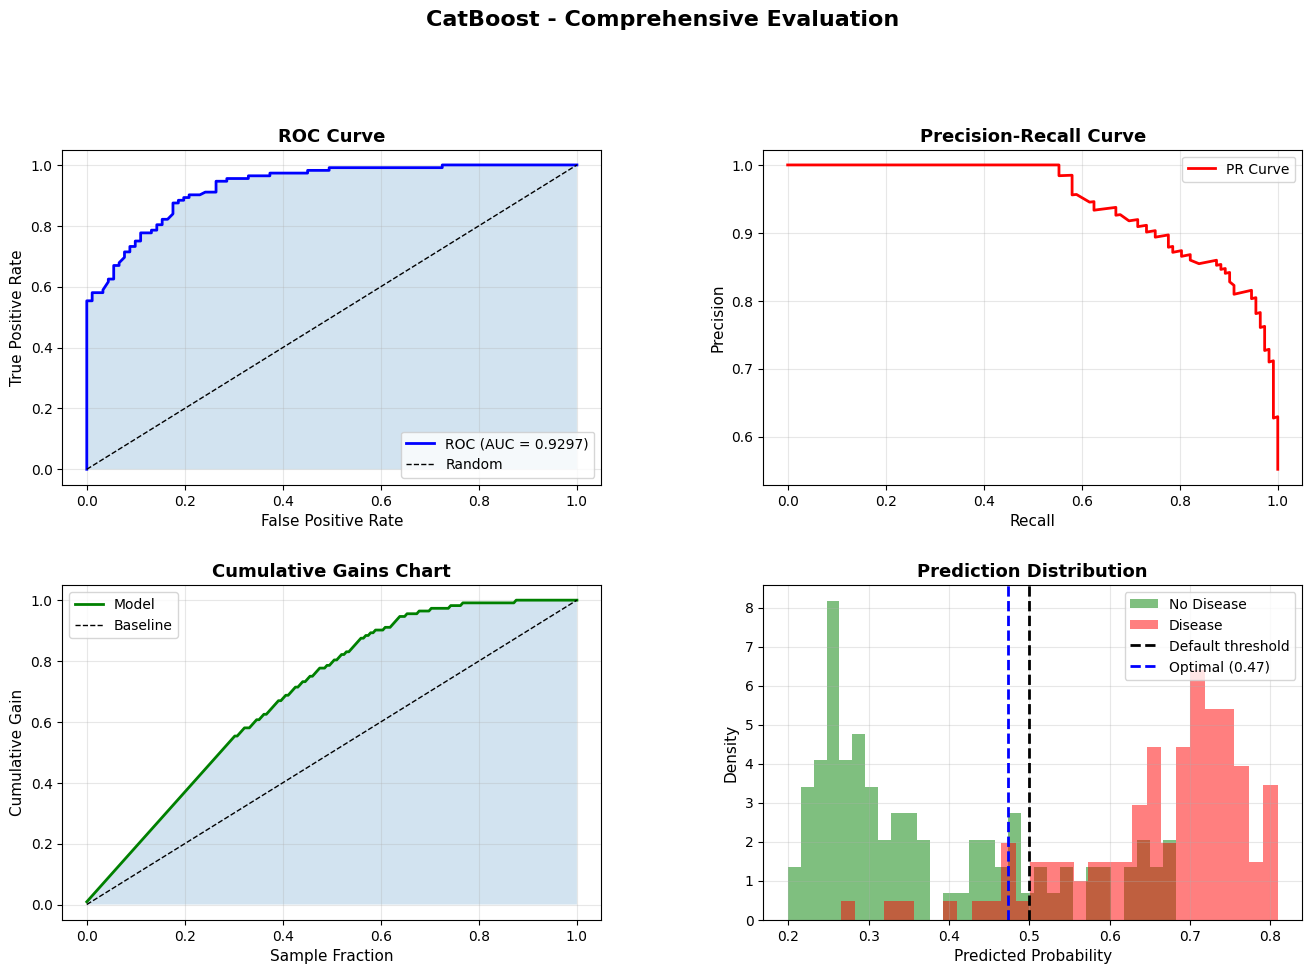


📊 COMPREHENSIVE METRICS:
  Accuracy       : 0.8522
  ROC-AUC        : 0.9297
  Precision      : 0.8417
  Recall         : 0.9018
  F1-Score       : 0.8707
  Matthews Corr. : 0.7010

COMPREHENSIVE EVALUATION - Random Forest (Optimized)


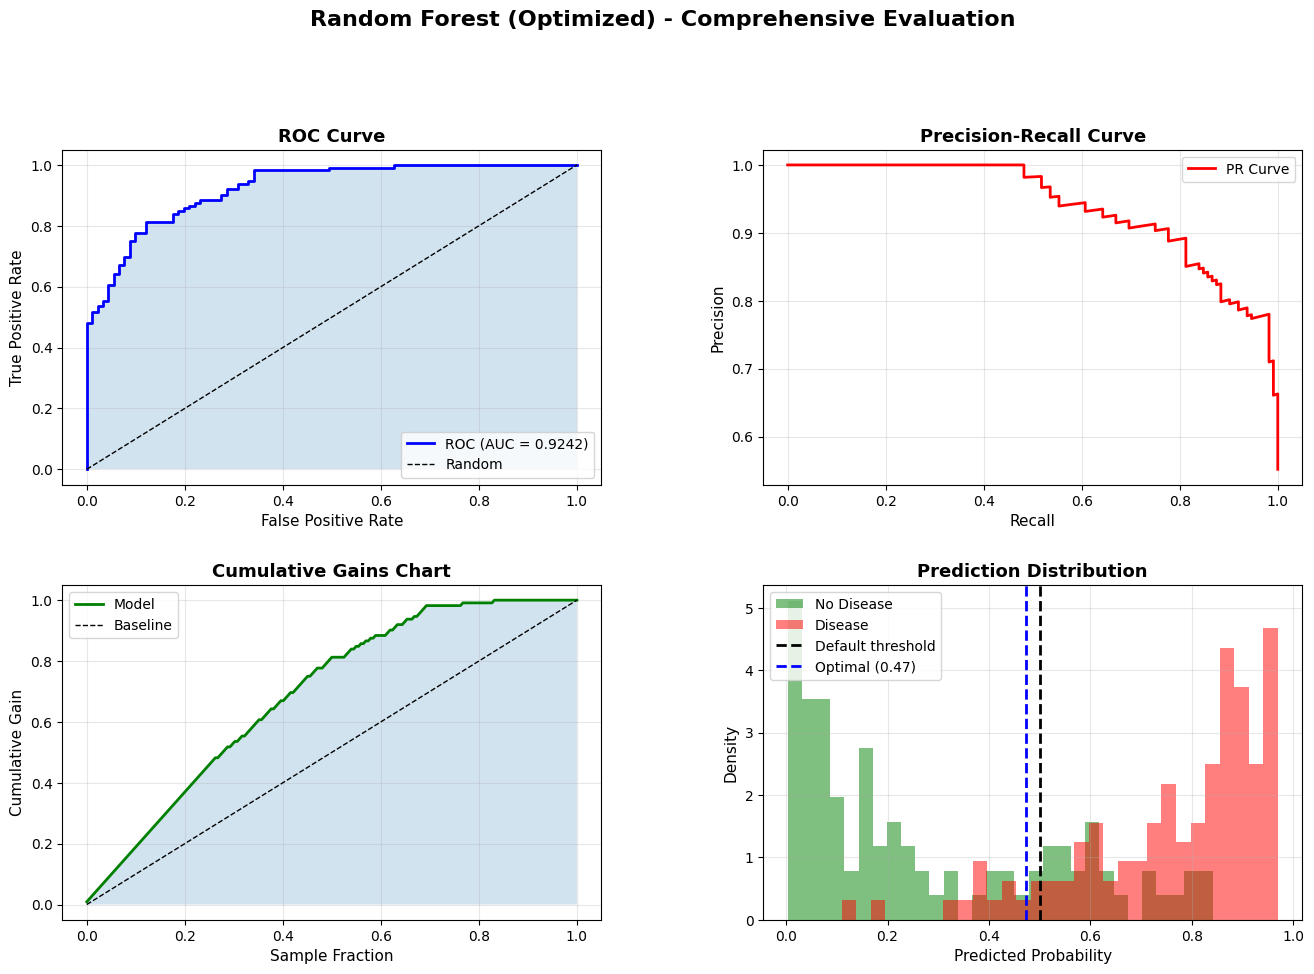


📊 COMPREHENSIVE METRICS:
  Accuracy       : 0.8177
  ROC-AUC        : 0.9242
  Precision      : 0.8049
  Recall         : 0.8839
  F1-Score       : 0.8426
  Matthews Corr. : 0.6312


In [26]:
# ============================================
# STEP 21: COMPREHENSIVE MODEL EVALUATION
# ============================================

from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

def comprehensive_evaluation(model, X_test, y_test, model_name, feature_names):
    """
    Comprehensive evaluation with multiple metrics and visualizations
    """
    print("\n" + "="*70)
    print(f"COMPREHENSIVE EVALUATION - {model_name}")
    print("="*70)
    
    # Get predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # 1. ROC Curve with AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    
    # 2. Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    
    # 3. Cumulative Gains Curve
    def cumulative_gains(y_true, y_score):
        n_pos = np.sum(y_true)
        if n_pos == 0:
            return np.linspace(0, 1, len(y_true))
        order = np.argsort(y_score)[::-1]
        y_true_sorted = y_true.iloc[order].values if hasattr(y_true, 'iloc') else y_true[order]
        gains = np.cumsum(y_true_sorted) / n_pos
        return gains
    
    gains = cumulative_gains(y_test, y_proba)
    
    # Create comprehensive plot
    fig = plt.figure(figsize=(16, 10))
    
    # 2x2 subplot layout
    gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    ax4 = fig.add_subplot(gs[1, 1])
    
    # Plot 1: ROC Curve
    ax1.plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC (AUC = {auc_score:.4f})')
    ax1.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
    ax1.fill_between(fpr, tpr, alpha=0.2)
    ax1.set_xlabel('False Positive Rate', fontsize=11)
    ax1.set_ylabel('True Positive Rate', fontsize=11)
    ax1.set_title('ROC Curve', fontsize=13, fontweight='bold')
    ax1.legend(loc='lower right')
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Precision-Recall Curve
    ax2.plot(recall, precision, 'r-', linewidth=2, label='PR Curve')
    ax2.set_xlabel('Recall', fontsize=11)
    ax2.set_ylabel('Precision', fontsize=11)
    ax2.set_title('Precision-Recall Curve', fontsize=13, fontweight='bold')
    ax2.legend(loc='upper right')
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Cumulative Gains
    x_vals = np.linspace(0, 1, len(gains))
    ax3.plot(x_vals, gains, 'g-', linewidth=2, label='Model')
    ax3.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Baseline')
    ax3.fill_between(x_vals, gains, alpha=0.2)
    ax3.set_xlabel('Sample Fraction', fontsize=11)
    ax3.set_ylabel('Cumulative Gain', fontsize=11)
    ax3.set_title('Cumulative Gains Chart', fontsize=13, fontweight='bold')
    ax3.legend(loc='upper left')
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Prediction Distribution
    ax4.hist(y_proba[y_test==0], bins=30, alpha=0.5, color='green', label='No Disease', density=True)
    ax4.hist(y_proba[y_test==1], bins=30, alpha=0.5, color='red', label='Disease', density=True)
    ax4.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Default threshold')
    if 'optimal_threshold' in globals():
        ax4.axvline(x=optimal_threshold, color='blue', linestyle='--', linewidth=2, label=f'Optimal ({optimal_threshold:.2f})')
    ax4.set_xlabel('Predicted Probability', fontsize=11)
    ax4.set_ylabel('Density', fontsize=11)
    ax4.set_title('Prediction Distribution', fontsize=13, fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.suptitle(f'{model_name} - Comprehensive Evaluation', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig(f'comprehensive_evaluation_{model_name.replace(" ", "_")}.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Print comprehensive metrics
    print("\n📊 COMPREHENSIVE METRICS:")
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'ROC-AUC': auc_score,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Matthews Corr.': matthews_corrcoef(y_test, y_pred)
    }
    
    for metric, value in metrics.items():
        print(f"  {metric:15s}: {value:.4f}")
    
    return metrics

# Run comprehensive evaluation on top 2 models
print("\n🔍 Running comprehensive evaluation on top models...")

top_metrics = {}
for i in range(min(2, len(comparison_df))):
    model_name = comparison_df.iloc[i]['Model']
    model = models_dict[model_name][0]
    metrics = comprehensive_evaluation(model, X_test, y_test, model_name, selected_features)
    top_metrics[model_name] = metrics

### STEP 22: Cross-Validation for Stability


🔍 Running cross-validation for stability analysis...

CROSS-VALIDATION STABILITY ANALYSIS
  Fold  1: Acc=0.7826, AUC=0.8638, F1=0.8077
  Fold  2: Acc=0.8261, AUC=0.9106, F1=0.8519
  Fold  3: Acc=0.8043, AUC=0.8623, F1=0.8269
  Fold  4: Acc=0.8370, AUC=0.8747, F1=0.8571
  Fold  5: Acc=0.7935, AUC=0.8508, F1=0.8155
  Fold  6: Acc=0.7717, AUC=0.8670, F1=0.7835
  Fold  7: Acc=0.7391, AUC=0.8302, F1=0.7551
  Fold  8: Acc=0.8152, AUC=0.8494, F1=0.8381
  Fold  9: Acc=0.7717, AUC=0.8321, F1=0.8073
  Fold 10: Acc=0.8370, AUC=0.9110, F1=0.8571

📊 Cross-Validation Summary:
   Metric   Mean    Std    Min    Max
 accuracy 0.7978 0.0304 0.7391 0.8370
  roc_auc 0.8652 0.0265 0.8302 0.9110
precision 0.8057 0.0232 0.7586 0.8333
   recall 0.8369 0.0555 0.7255 0.9020
       f1 0.8200 0.0317 0.7551 0.8571


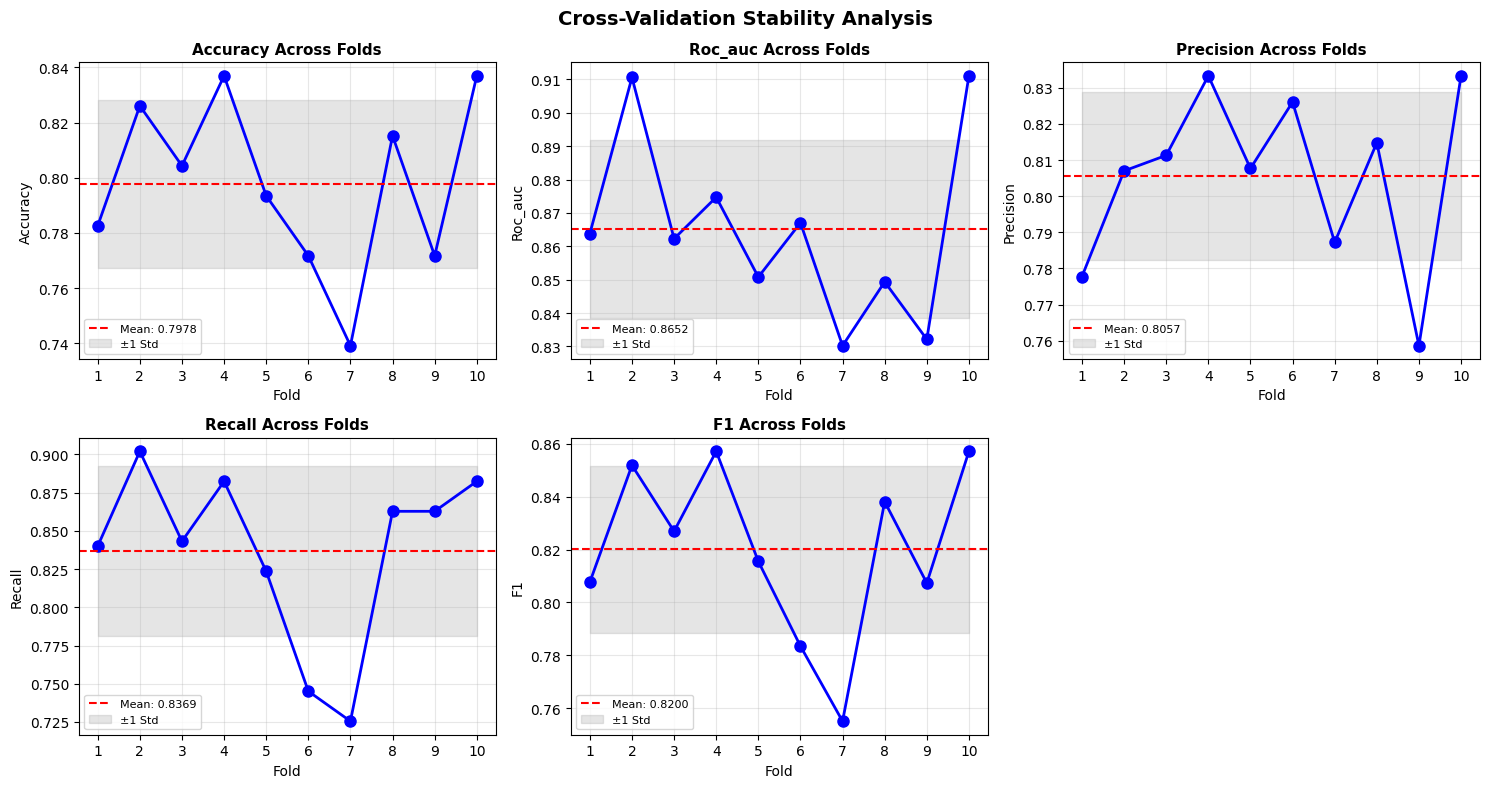

In [28]:
# ============================================
# STEP 22: CROSS-VALIDATION FOR STABILITY (FIXED)
# ============================================

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def cross_validation_stability(model_func, X, y, n_folds=10):
    """
    Perform cross-validation to check model stability
    model_func should be a function that returns an INSTANTIATED model
    """
    print("\n" + "="*70)
    print("CROSS-VALIDATION STABILITY ANALYSIS")
    print("="*70)
    
    cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    # Store metrics for each fold
    cv_results = {
        'accuracy': [],
        'roc_auc': [],
        'precision': [],
        'recall': [],
        'f1': []
    }
    
    fold_num = 1
    X_array = X.values if hasattr(X, 'values') else X
    y_array = y.values if hasattr(y, 'values') else y
    
    for train_idx, val_idx in cv.split(X_array, y_array):
        # Handle different input types
        if hasattr(X, 'iloc'):
            X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
            y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        else:
            X_train_fold, X_val_fold = X[train_idx], X[val_idx]
            y_train_fold, y_val_fold = y[train_idx], y[val_idx]
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_fold)
        X_val_scaled = scaler.transform(X_val_fold)
        
        # Train model - FIX: call the function to get instantiated model
        model = model_func()  # This now returns an instantiated model
        model.fit(X_train_scaled, y_train_fold)
        
        # Predict
        y_pred = model.predict(X_val_scaled)
        y_proba = model.predict_proba(X_val_scaled)[:, 1]
        
        # Calculate metrics
        cv_results['accuracy'].append(accuracy_score(y_val_fold, y_pred))
        cv_results['roc_auc'].append(roc_auc_score(y_val_fold, y_proba))
        cv_results['precision'].append(precision_score(y_val_fold, y_pred))
        cv_results['recall'].append(recall_score(y_val_fold, y_pred))
        cv_results['f1'].append(f1_score(y_val_fold, y_pred))
        
        print(f"  Fold {fold_num:2d}: Acc={cv_results['accuracy'][-1]:.4f}, "
              f"AUC={cv_results['roc_auc'][-1]:.4f}, F1={cv_results['f1'][-1]:.4f}")
        fold_num += 1
    
    # Calculate statistics
    cv_summary = pd.DataFrame({
        'Metric': list(cv_results.keys()),
        'Mean': [np.mean(v) for v in cv_results.values()],
        'Std': [np.std(v) for v in cv_results.values()],
        'Min': [np.min(v) for v in cv_results.values()],
        'Max': [np.max(v) for v in cv_results.values()]
    })
    
    print("\n📊 Cross-Validation Summary:")
    print(cv_summary.round(4).to_string(index=False))
    
    # Plot stability
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()
    
    for idx, (metric, values) in enumerate(cv_results.items()):
        if idx < len(axes):
            ax = axes[idx]
            ax.plot(range(1, n_folds+1), values, 'bo-', linewidth=2, markersize=8)
            ax.axhline(y=np.mean(values), color='r', linestyle='--', 
                       label=f'Mean: {np.mean(values):.4f}')
            ax.fill_between(range(1, n_folds+1), 
                           np.mean(values) - np.std(values),
                           np.mean(values) + np.std(values),
                           alpha=0.2, color='gray', label=f'±1 Std')
            ax.set_xlabel('Fold', fontsize=10)
            ax.set_ylabel(metric.capitalize(), fontsize=10)
            ax.set_title(f'{metric.capitalize()} Across Folds', fontsize=11, fontweight='bold')
            ax.legend(fontsize=8)
            ax.grid(True, alpha=0.3)
            ax.set_xticks(range(1, n_folds+1))
    
    # Hide any unused subplots
    for idx in range(len(cv_results), len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle('Cross-Validation Stability Analysis', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('cv_stability.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    return cv_results, cv_summary

# Define model function for best model - FIX: Return instantiated models
def get_best_model_func():
    best_model_name = comparison_df.iloc[0]['Model']
    
    if 'CatBoost' in best_model_name:
        try:
            from catboost import CatBoostClassifier
            return CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6,
                                      l2_leaf_reg=3, random_seed=42, verbose=0)
        except:
            pass
    
    if 'XGBoost' in best_model_name:
        try:
            import xgboost as xgb
            return xgb.XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.1,
                                     random_state=42, use_label_encoder=False, eval_metric='logloss')
        except:
            pass
    
    if 'LightGBM' in best_model_name:
        try:
            import lightgbm as lgb
            return lgb.LGBMClassifier(n_estimators=300, max_depth=5, learning_rate=0.1,
                                      random_state=42, verbose=-1)
        except:
            pass
    
    # Default to Random Forest
    from sklearn.ensemble import RandomForestClassifier
    return RandomForestClassifier(n_estimators=300, max_depth=10,
                                 min_samples_split=5, random_state=42, n_jobs=-1)

# Run cross-validation
print("\n🔍 Running cross-validation for stability analysis...")
# Get an instantiated model for the function
model_instance = get_best_model_func()
# Create a function that returns the same model type
def model_creator():
    best_model_name = comparison_df.iloc[0]['Model']
    if 'CatBoost' in best_model_name:
        from catboost import CatBoostClassifier
        return CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6,
                                  l2_leaf_reg=3, random_seed=42, verbose=0)
    elif 'XGBoost' in best_model_name:
        import xgboost as xgb
        return xgb.XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.1,
                                 random_state=42, use_label_encoder=False, eval_metric='logloss')
    elif 'LightGBM' in best_model_name:
        import lightgbm as lgb
        return lgb.LGBMClassifier(n_estimators=300, max_depth=5, learning_rate=0.1,
                                  random_state=42, verbose=-1)
    else:
        from sklearn.ensemble import RandomForestClassifier
        return RandomForestClassifier(n_estimators=300, max_depth=10,
                                     min_samples_split=5, random_state=42, n_jobs=-1)

cv_results, cv_summary = cross_validation_stability(model_creator, X_selected, y, n_folds=10)

### STEP 23: Hard Cases Analysis


🔍 Analyzing hard cases for best model...

HARD CASES ANALYSIS

📊 Hard Cases Summary:
  Total test samples: 203
  False Positives: 19 (9.4%)
  False Negatives: 11 (5.4%)
  Low Confidence Predictions: 72 (35.5%)

🔴 FALSE POSITIVES (Predicted disease, actually healthy):
     Probability  Confidence  trestbps   dataset        cp      thal  cp_low_risk
5       0.670519    0.341038 -1.019838  1.559174 -0.818774 -0.328406    -0.835115
15      0.682949    0.365898 -0.122849  1.559174  1.273649 -0.328406     1.197440
27      0.583230    0.166459  0.157461 -1.095558 -0.818774  1.741001    -0.835115
35      0.671612    0.343224  2.680244  1.559174  1.273649 -0.328406     1.197440
53      0.553071    0.106143  0.998389 -0.210647 -0.818774 -0.328406    -0.835115
75      0.575075    0.150150 -0.122849 -0.210647 -0.818774 -0.328406    -0.835115
81      0.511056    0.022113 -1.131962 -1.095558 -0.818774 -0.328406    -0.835115
90      0.640806    0.281612 -1.804704  1.559174 -0.818774 -0.328406    -0.

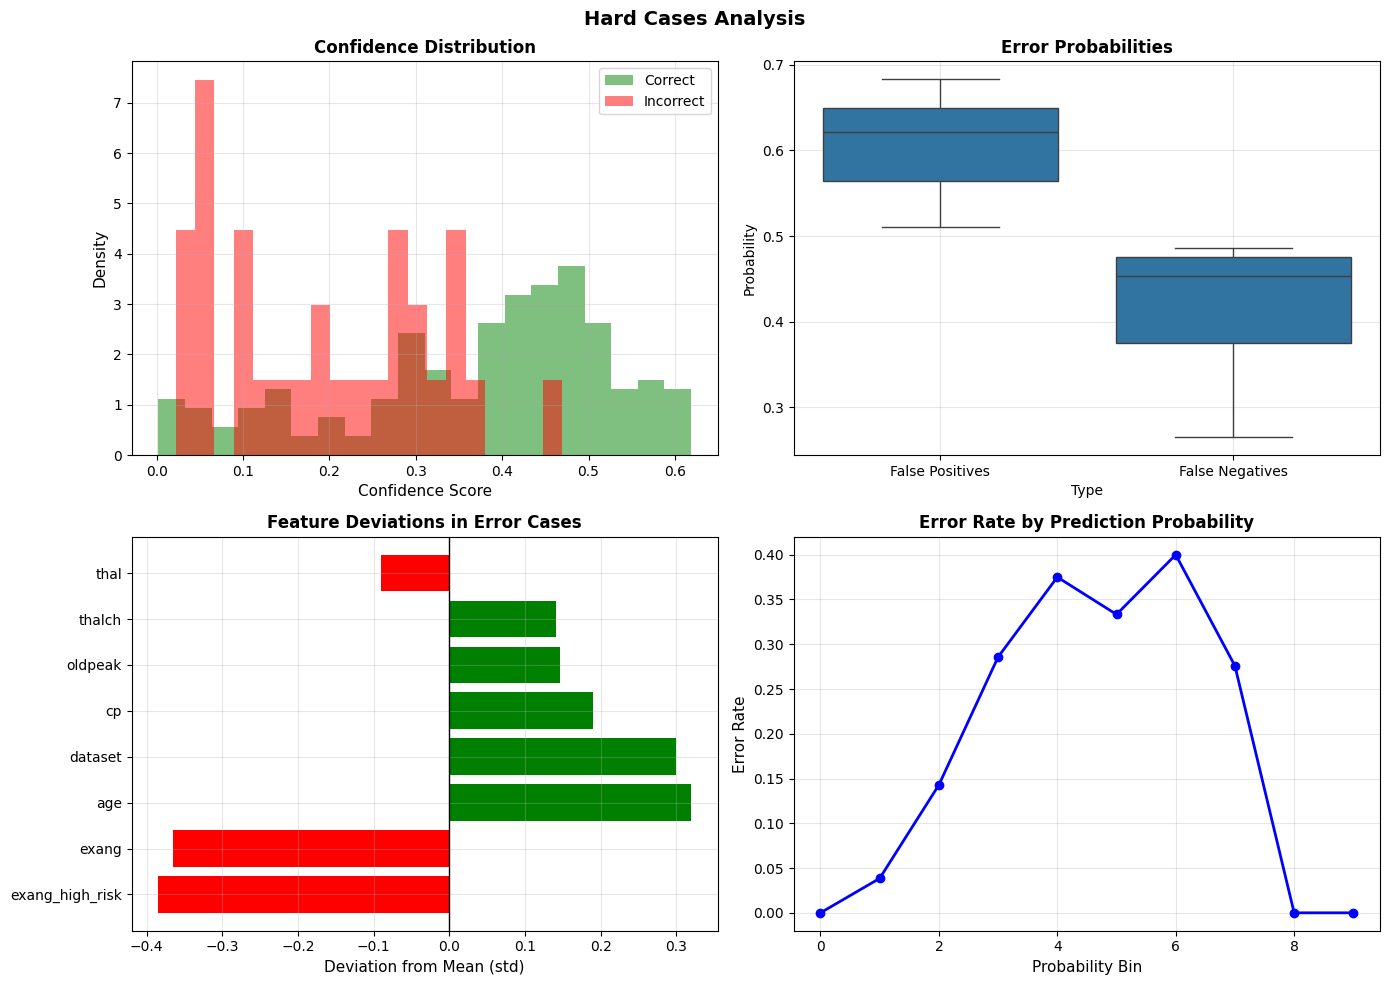


📈 STATISTICAL COMPARISON: Hard Cases vs Overall
--------------------------------------------------
    Feature Overall Mean Overall Std FP Mean FN Mean FP Effect FN Effect
   trestbps         0.02        1.04    0.01    0.01     -0.01     -0.01
    dataset         0.00        0.96    0.77   -0.53      0.80     -0.56
         cp        -0.03        0.99   -0.05    0.51     -0.02      0.55
       thal        -0.03        0.98   -0.11   -0.14     -0.08     -0.11
cp_low_risk        -0.01        1.00    0.13   -0.10      0.14     -0.08


In [29]:
# ============================================
# STEP 23: HARD CASES ANALYSIS (WITH FIXES)
# ============================================

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def analyze_hard_cases(model, X_test, y_test, feature_names):
    """
    Identify and analyze cases where the model struggles
    """
    print("\n" + "="*70)
    print("HARD CASES ANALYSIS")
    print("="*70)
    
    # Get predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Create results dataframe
    if hasattr(X_test, 'reset_index'):
        results_df = X_test.copy().reset_index(drop=True)
    else:
        results_df = pd.DataFrame(X_test, columns=feature_names)
    
    # Reset indices to ensure alignment
    if hasattr(y_test, 'reset_index'):
        y_test_reset = y_test.reset_index(drop=True)
    else:
        y_test_reset = y_test
    
    results_df['True_Label'] = y_test_reset
    results_df['Predicted'] = y_pred
    results_df['Probability'] = y_proba
    results_df['Correct'] = (results_df['True_Label'] == results_df['Predicted'])
    results_df['Confidence'] = np.abs(y_proba - 0.5) * 2  # 0 to 1 scale
    results_df['Error_Type'] = 'Correct'
    results_df.loc[(results_df['True_Label'] == 0) & (results_df['Predicted'] == 1), 'Error_Type'] = 'False Positive'
    results_df.loc[(results_df['True_Label'] == 1) & (results_df['Predicted'] == 0), 'Error_Type'] = 'False Negative'
    
    # Identify hard cases
    false_positives = results_df[results_df['Error_Type'] == 'False Positive']
    false_negatives = results_df[results_df['Error_Type'] == 'False Negative']
    low_confidence = results_df[results_df['Confidence'] < 0.3]
    
    print(f"\n📊 Hard Cases Summary:")
    print(f"  Total test samples: {len(results_df)}")
    print(f"  False Positives: {len(false_positives)} ({len(false_positives)/len(results_df)*100:.1f}%)")
    print(f"  False Negatives: {len(false_negatives)} ({len(false_negatives)/len(results_df)*100:.1f}%)")
    print(f"  Low Confidence Predictions: {len(low_confidence)} ({len(low_confidence)/len(results_df)*100:.1f}%)")
    
    # Analyze false positives
    if len(false_positives) > 0:
        print("\n🔴 FALSE POSITIVES (Predicted disease, actually healthy):")
        display_cols = ['Probability', 'Confidence'] + [f for f in feature_names if f in results_df.columns][:5]
        print(false_positives[display_cols].head(10).to_string())
    
    # Analyze false negatives
    if len(false_negatives) > 0:
        print("\n🔵 FALSE NEGATIVES (Predicted healthy, actually disease):")
        display_cols = ['Probability', 'Confidence'] + [f for f in feature_names if f in results_df.columns][:5]
        print(false_negatives[display_cols].head(10).to_string())
    
    # Visualize error patterns
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Confidence distribution
    ax = axes[0, 0]
    correct_conf = results_df[results_df['Correct']]['Confidence']
    incorrect_conf = results_df[~results_df['Correct']]['Confidence']
    
    if len(correct_conf) > 0 and len(incorrect_conf) > 0:
        ax.hist(correct_conf, bins=20, alpha=0.5, color='green', label='Correct', density=True)
        ax.hist(incorrect_conf, bins=20, alpha=0.5, color='red', label='Incorrect', density=True)
    elif len(correct_conf) > 0:
        ax.hist(correct_conf, bins=20, alpha=0.5, color='green', label='Correct', density=True)
    elif len(incorrect_conf) > 0:
        ax.hist(incorrect_conf, bins=20, alpha=0.5, color='red', label='Incorrect', density=True)
    
    ax.set_xlabel('Confidence Score', fontsize=11)
    ax.set_ylabel('Density', fontsize=11)
    ax.set_title('Confidence Distribution', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Plot 2: Error types by probability
    ax = axes[0, 1]
    error_probs = pd.DataFrame({
        'Type': ['False Positives'] * len(false_positives) + ['False Negatives'] * len(false_negatives),
        'Probability': list(false_positives['Probability']) + list(false_negatives['Probability'])
    })
    if len(error_probs) > 0:
        sns.boxplot(data=error_probs, x='Type', y='Probability', ax=ax)
        ax.set_title('Error Probabilities', fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3)
    
    # Plot 3: Feature importance for errors
    ax = axes[1, 0]
    if len(false_positives) > 0 or len(false_negatives) > 0:
        # Get mean values for error cases
        error_indices = list(false_positives.index) + list(false_negatives.index)
        
        # Calculate feature deviations
        if hasattr(X_test, 'iloc'):
            error_features_mean = X_test.iloc[error_indices].mean()
            overall_mean = X_test.mean()
            overall_std = X_test.std()
        else:
            error_features_mean = pd.DataFrame(X_test, columns=feature_names).iloc[error_indices].mean()
            overall_mean = pd.DataFrame(X_test, columns=feature_names).mean()
            overall_std = pd.DataFrame(X_test, columns=feature_names).std()
        
        # Calculate standardized deviations
        feature_dev = pd.Series(index=error_features_mean.index)
        for col in error_features_mean.index:
            if overall_std[col] > 0:
                feature_dev[col] = (error_features_mean[col] - overall_mean[col]) / overall_std[col]
            else:
                feature_dev[col] = error_features_mean[col] - overall_mean[col]
        
        feature_dev = feature_dev.sort_values(key=abs, ascending=False).head(8)
        
        colors = ['red' if x < 0 else 'green' for x in feature_dev.values]
        ax.barh(range(len(feature_dev)), feature_dev.values, color=colors)
        ax.set_yticks(range(len(feature_dev)))
        ax.set_yticklabels(feature_dev.index)
        ax.set_xlabel('Deviation from Mean (std)', fontsize=11)
        ax.set_title('Feature Deviations in Error Cases', fontsize=12, fontweight='bold')
        ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
        ax.grid(True, alpha=0.3)
    
    # Plot 4: Error rate by probability bin
    ax = axes[1, 1]
    try:
        results_df['Prob_Bin'] = pd.cut(results_df['Probability'], bins=10)
        error_rate_by_bin = results_df.groupby('Prob_Bin')['Correct'].apply(lambda x: 1 - x.mean())
        error_rate_by_bin = error_rate_by_bin.fillna(0)
        
        ax.plot(range(len(error_rate_by_bin)), error_rate_by_bin.values, 'bo-', linewidth=2)
        ax.set_xlabel('Probability Bin', fontsize=11)
        ax.set_ylabel('Error Rate', fontsize=11)
        ax.set_title('Error Rate by Prediction Probability', fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3)
    except:
        ax.text(0.5, 0.5, 'Insufficient data for analysis', 
                ha='center', va='center', transform=ax.transAxes)
    
    plt.suptitle('Hard Cases Analysis', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('hard_cases_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    return results_df, false_positives, false_negatives

# Run hard cases analysis on best model
print("\n🔍 Analyzing hard cases for best model...")
results_df, fp, fn = analyze_hard_cases(best_model, X_test, y_test, selected_features)

# Additional analysis: Characteristics of hard cases
print("\n📈 STATISTICAL COMPARISON: Hard Cases vs Overall")
print("-" * 50)

# Calculate statistics for different groups
stats = []
feature_cols = [f for f in selected_features if f in results_df.columns]

for feature in feature_cols[:5]:  # Limit to top 5 features
    overall_mean = results_df[feature].mean()
    fp_mean = fp[feature].mean() if len(fp) > 0 else np.nan
    fn_mean = fn[feature].mean() if len(fn) > 0 else np.nan
    overall_std = results_df[feature].std()
    
    stats.append({
        'Feature': feature,
        'Overall Mean': f'{overall_mean:.2f}',
        'Overall Std': f'{overall_std:.2f}',
        'FP Mean': f'{fp_mean:.2f}' if not np.isnan(fp_mean) else 'N/A',
        'FN Mean': f'{fn_mean:.2f}' if not np.isnan(fn_mean) else 'N/A',
        'FP Effect': f'{((fp_mean - overall_mean)/overall_std):.2f}' if not np.isnan(fp_mean) and overall_std > 0 else 'N/A',
        'FN Effect': f'{((fn_mean - overall_mean)/overall_std):.2f}' if not np.isnan(fn_mean) and overall_std > 0 else 'N/A'
    })

stats_df = pd.DataFrame(stats)
print(stats_df.to_string(index=False))